In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [4]:
# masses = [
#     7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
#     24, 26, 28, 30, 32, 40, 46, 50
# ]
# masses = [ 11, 12, 13, 14, 15 ]
affect = True
# couplings = [-10]
masses = [ 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ]
couplings = [ -10, -9, -8.5, -8 ]

colormap_m = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(masses), np.max(masses)),
    plt.get_cmap(f'plasma')
)

colormap_g = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(couplings), np.max(couplings)),
    plt.get_cmap(f'winter')
)

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]

In [5]:
runs = dict()
for m in masses:
    for g in couplings:
        try:
            key = f'm{m:04.1f}_g{g:+05.2f}{"" if affect else "_0"}'
    
            run = pd.read_csv(f'csv/{key}/index.csv')
            run['mass (Msun)'] = float(key[1:5])
            run['coupling'] = float(key[7:])
            # run['slices'] = [
            #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
            #     for model in run['slice']
            # ]
        
            runs[key] = run
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m08.0_g-10.00,	m08.0_g-9.00,	m08.0_g-8.50,	m08.0_g-8.00,	m09.0_g-10.00,	m09.0_g-9.00,	m09.0_g-8.50,	m09.0_g-8.00,	m10.0_g-10.00,	m10.0_g-9.00,	m10.0_g-8.50,	m10.0_g-8.00,	m11.0_g-10.00,	m11.0_g-9.00,	m11.0_g-8.50,	m11.0_g-8.00,	m12.0_g-10.00,	m12.0_g-9.00,	m12.0_g-8.50,	m12.0_g-8.00,	m13.0_g-10.00,	m13.0_g-9.00,	m13.0_g-8.50,	m13.0_g-8.00,	m14.0_g-10.00,	m14.0_g-9.00,	m14.0_g-8.50,	m14.0_g-8.00,	m15.0_g-10.00,	m15.0_g-9.00,	m15.0_g-8.50,	m15.0_g-8.00,	m16.0_g-10.00,	m16.0_g-9.00,	[Errno 2] No such file or directory: 'csv/m16.0_g-8.50/index.csv'
m16.0_g-8.00,	m17.0_g-10.00,	m17.0_g-9.00,	[Errno 2] No such file or directory: 'csv/m17.0_g-8.50/index.csv'
m17.0_g-8.00,	m18.0_g-10.00,	m18.0_g-9.00,	[Errno 2] No such file or directory: 'csv/m18.0_g-8.50/index.csv'
m18.0_g-8.00,	m19.0_g-10.00,	m19.0_g-9.00,	[Errno 2] No such file or directory: 'csv/m19.0_g-8.50/index.csv'
m19.0_g-8.00,	m20.0_g-10.00,	m20.0_g-9.00,	[Errno 2] No such file or directory: 'csv/m20.0_g-8.50/index.csv'
m20.0_g-8.00,

In [6]:
colormap = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(7), np.max(50)),
    plt.get_cmap(f'winter')
)


In [7]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),surface num_a (/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,20.0,-8.0,1.000000e-05,9.460200e+06,0.000010,5.212375e+05,4199.619138,1.471047e+16,0.000000e+00,0.000000e+00,0.000000e+00,4.639094e+18,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,94.0,20.0,-8.0,1.000000e+03,9.459200e+06,93.953230,8.132117e+05,4461.668192,2.213395e+19,0.000000e+00,0.000000e+00,0.000000e+00,6.558089e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,95.0,20.0,-8.0,1.112744e+03,9.459087e+06,112.743876,8.337625e+05,4113.061960,1.031299e+21,0.000000e+00,0.000000e+00,0.000000e+00,3.732354e+30,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
3,96.0,20.0,-8.0,1.231125e+03,9.458969e+06,118.381070,8.563834e+05,4119.436663,1.632812e+21,0.000000e+00,0.000000e+00,0.000000e+00,9.828076e+30,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,9.862887e-100
4,97.0,20.0,-8.0,1.355425e+03,9.458844e+06,124.300124,8.807176e+05,4128.504247,2.509249e+21,0.000000e+00,0.000000e+00,0.000000e+00,1.966415e+31,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.052289e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,796.0,20.0,-8.0,9.459921e+06,2.783740e+02,67.028600,1.332044e+08,15990.620881,4.857269e+38,4.161529e+33,4.582048e+23,6.499745e+29,7.739292e+52,4.877538e+44,5.791819e+33,0.001066,0.002930,0.001214,6.735862e-05
704,797.0,20.0,-8.0,9.459986e+06,2.137880e+02,64.586069,1.337969e+08,15838.527353,4.854394e+38,4.302577e+33,5.460587e+23,7.745974e+29,7.739391e+52,4.965172e+44,6.904024e+33,0.001066,0.002930,0.001214,6.736897e-05
705,798.0,20.0,-8.0,9.460054e+06,1.459726e+02,67.815372,1.342250e+08,15678.334951,4.851945e+38,4.456652e+33,6.407330e+23,9.088951e+29,7.739494e+52,5.060483e+44,8.274312e+33,0.001066,0.002930,0.001214,6.737943e-05
706,799.0,20.0,-8.0,9.460125e+06,7.476645e+01,71.206141,1.348875e+08,15509.373829,4.857899e+38,4.624828e+33,7.777247e+23,1.103221e+30,7.739604e+52,5.164336e+44,1.002074e+34,0.001066,0.002930,0.001214,6.738952e-05


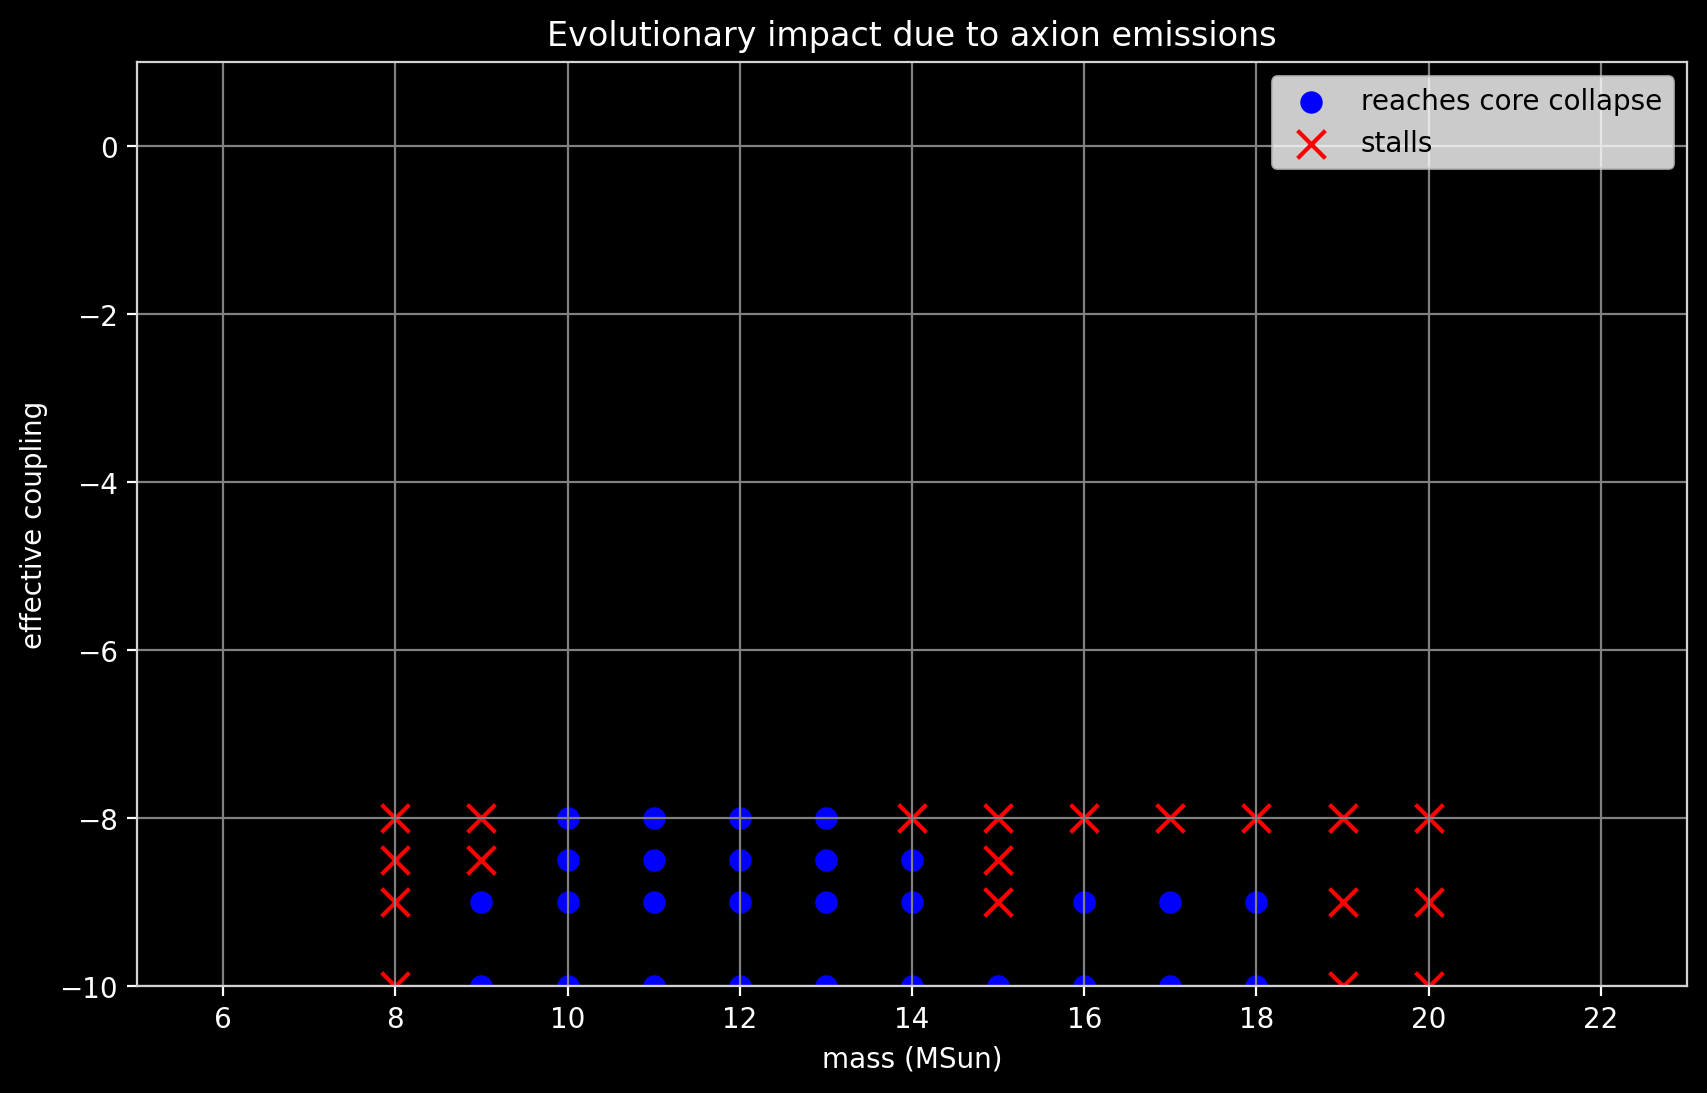

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')

couplings = np.zeros(len(runs))
masses = np.zeros_like(couplings)
Ts = np.zeros_like(couplings)
ages = np.zeros_like(couplings)
slices = np.zeros_like(couplings)

for (i, key) in enumerate(runs):
    run = runs[key]
    g = run['coupling'][0]
    m = run['mass (Msun)'][0]
    # if g > -8.8: continue
    couplings[i] = g
    masses[i] = m
    Ts[i] = np.array(run['core T (K)'])[-1]
    ages[i] = np.array(run['age (years)'])[-1]
    slices[i] = np.array(run['slice'])[-1]

Tcut = 1e9
slicecut = 4000
plt.grid(c='gray')
plt.scatter(masses[Ts>Tcut], couplings[Ts>Tcut], marker='o', c='blue', s=50, label='reaches core collapse')
plt.scatter(masses[Ts<Tcut], couplings[Ts<Tcut], marker='x', c='red', s=100, label='stalls')

plt.xlabel('mass (MSun)')
plt.ylabel('effective coupling')
plt.ylim(-10, 1)
plt.xlim(5, 23)
plt.legend()

plt.title('Evolutionary impact due to axion emissions', c='white')
# plt.legend()
plt.show()

Text(0, 0.5, 'Number of time steps')

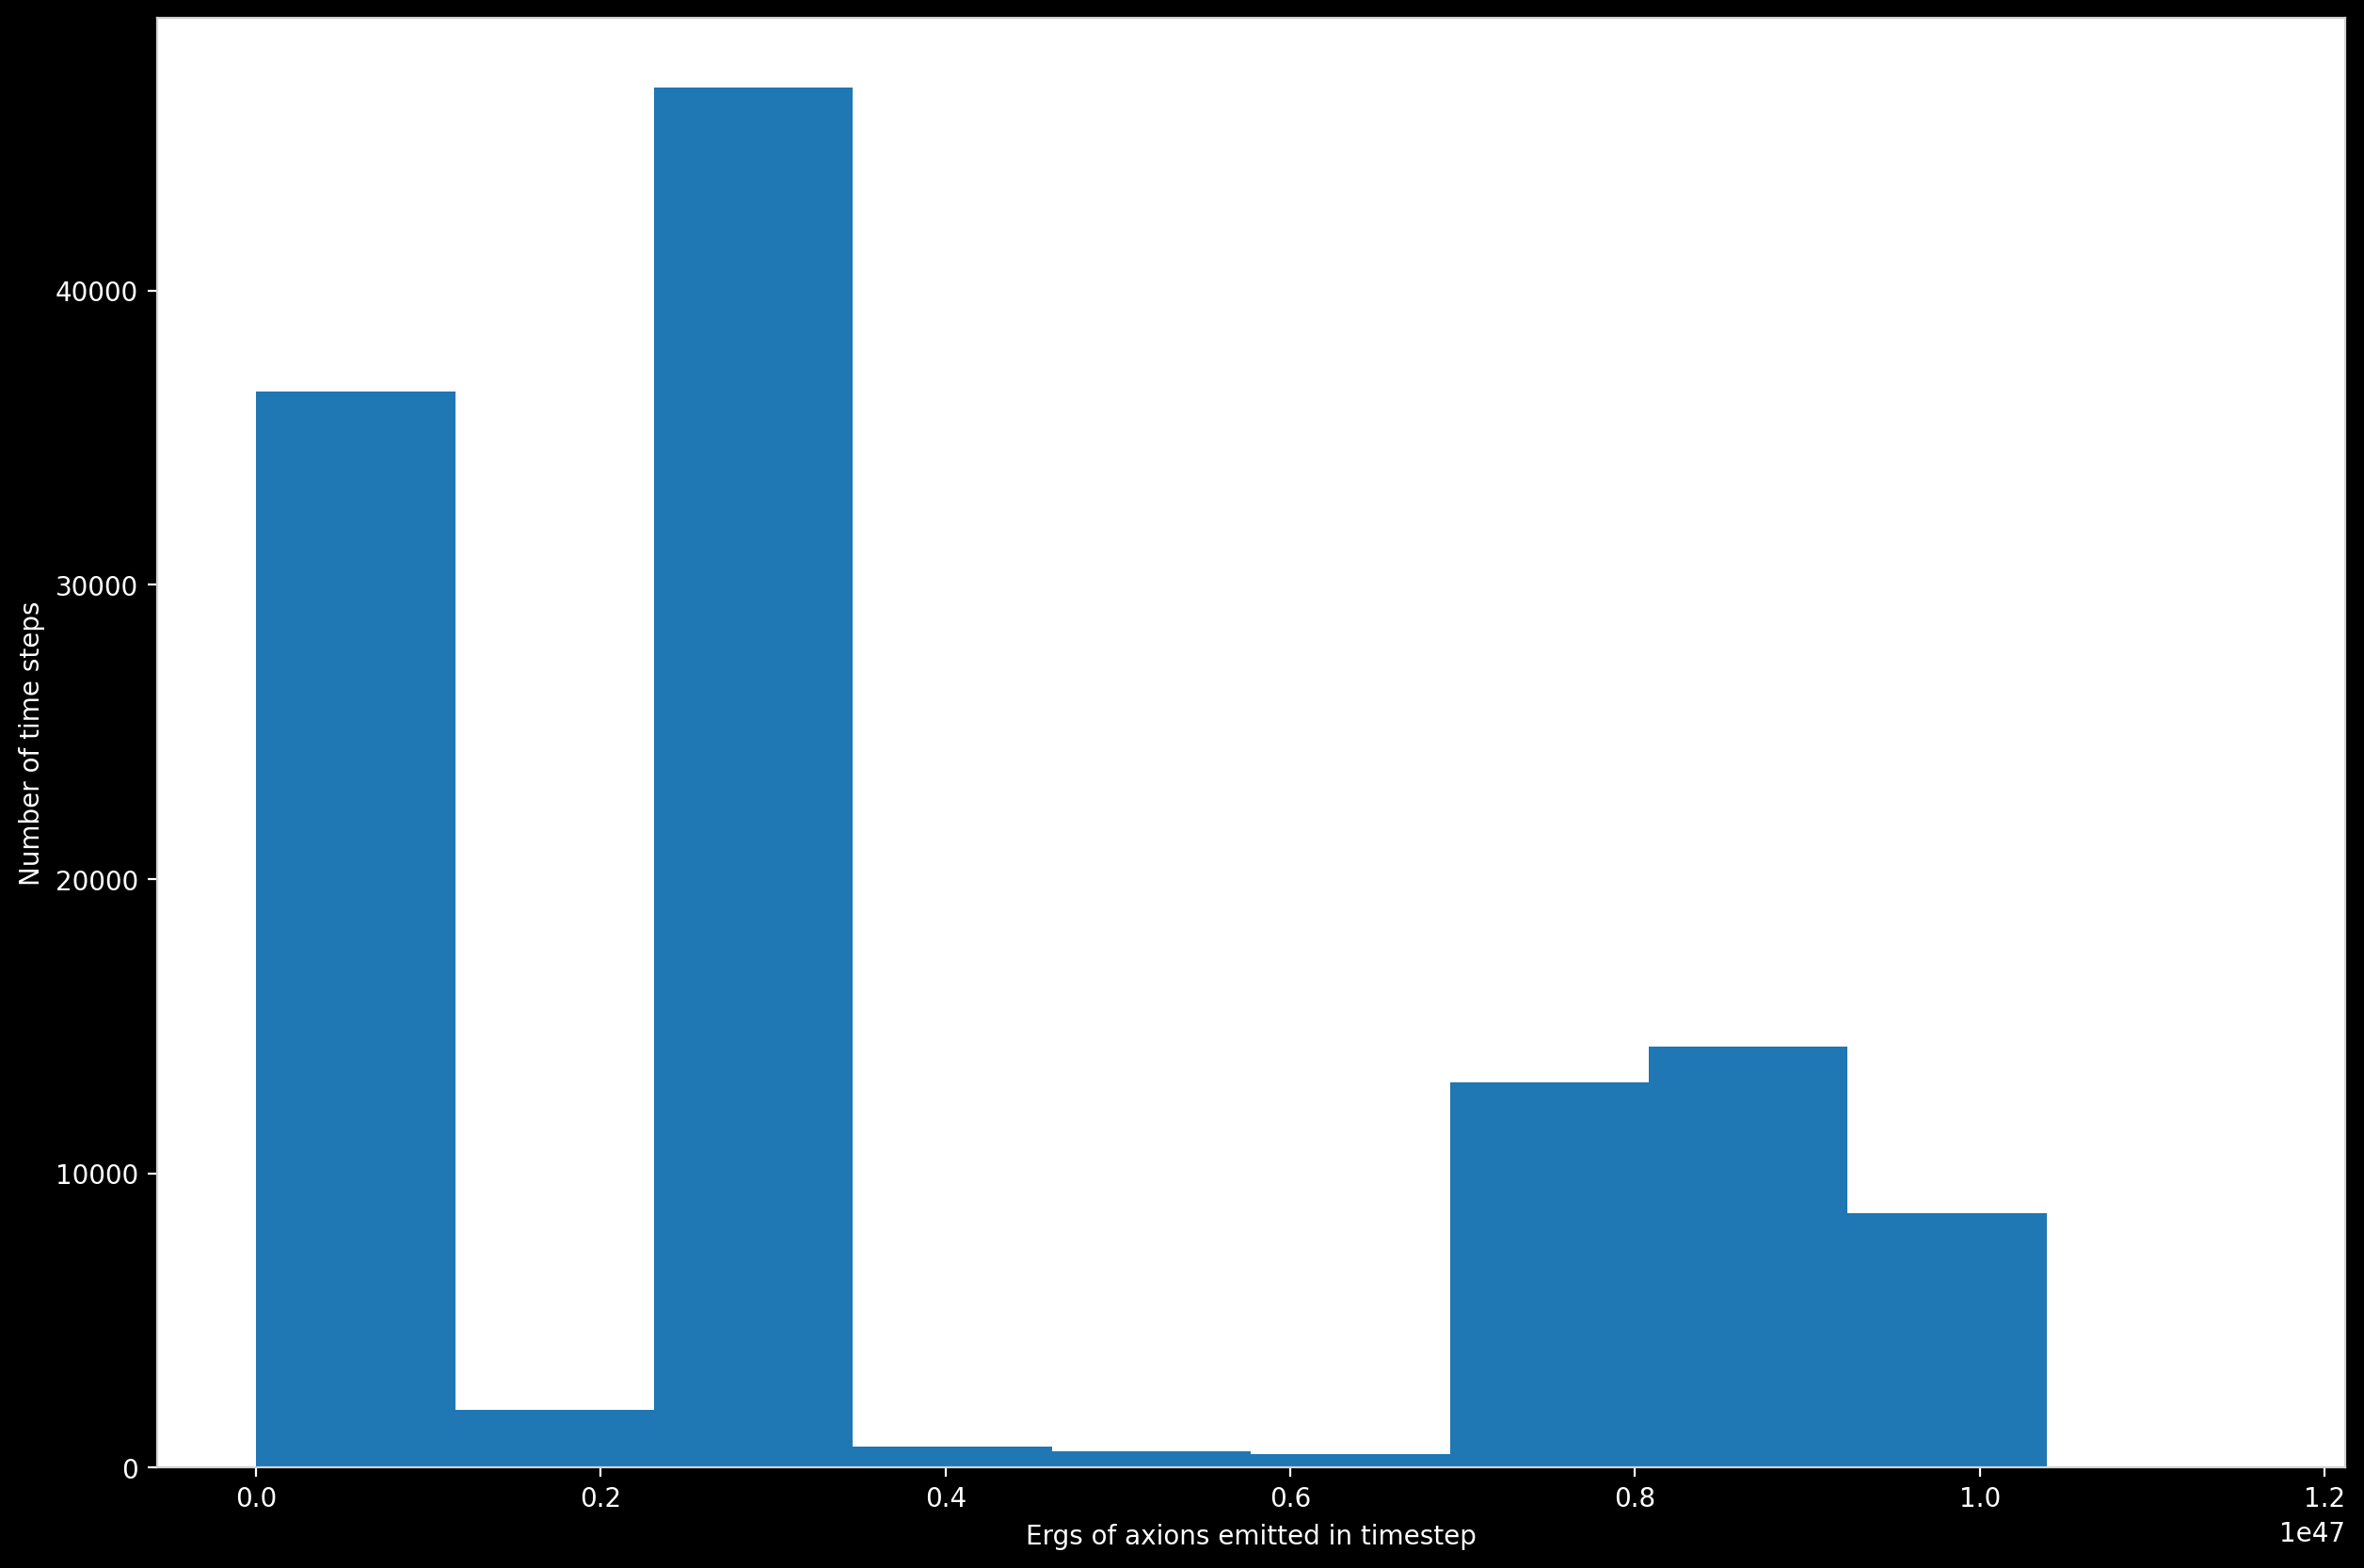

In [9]:
blah = []
for (i, key) in enumerate(runs):
    run = runs[key]
    blah.append(run['dt (years)'] * 3.154e+7 * run['surface lum_a (ergs/s)'])
blahs = np.concatenate(blah)
plt.hist(blahs[blahs>1e43], bins=10)
plt.xlabel("Ergs of axions emitted in timestep")
plt.ylabel("Number of time steps")

(0.0, 100000000.0)

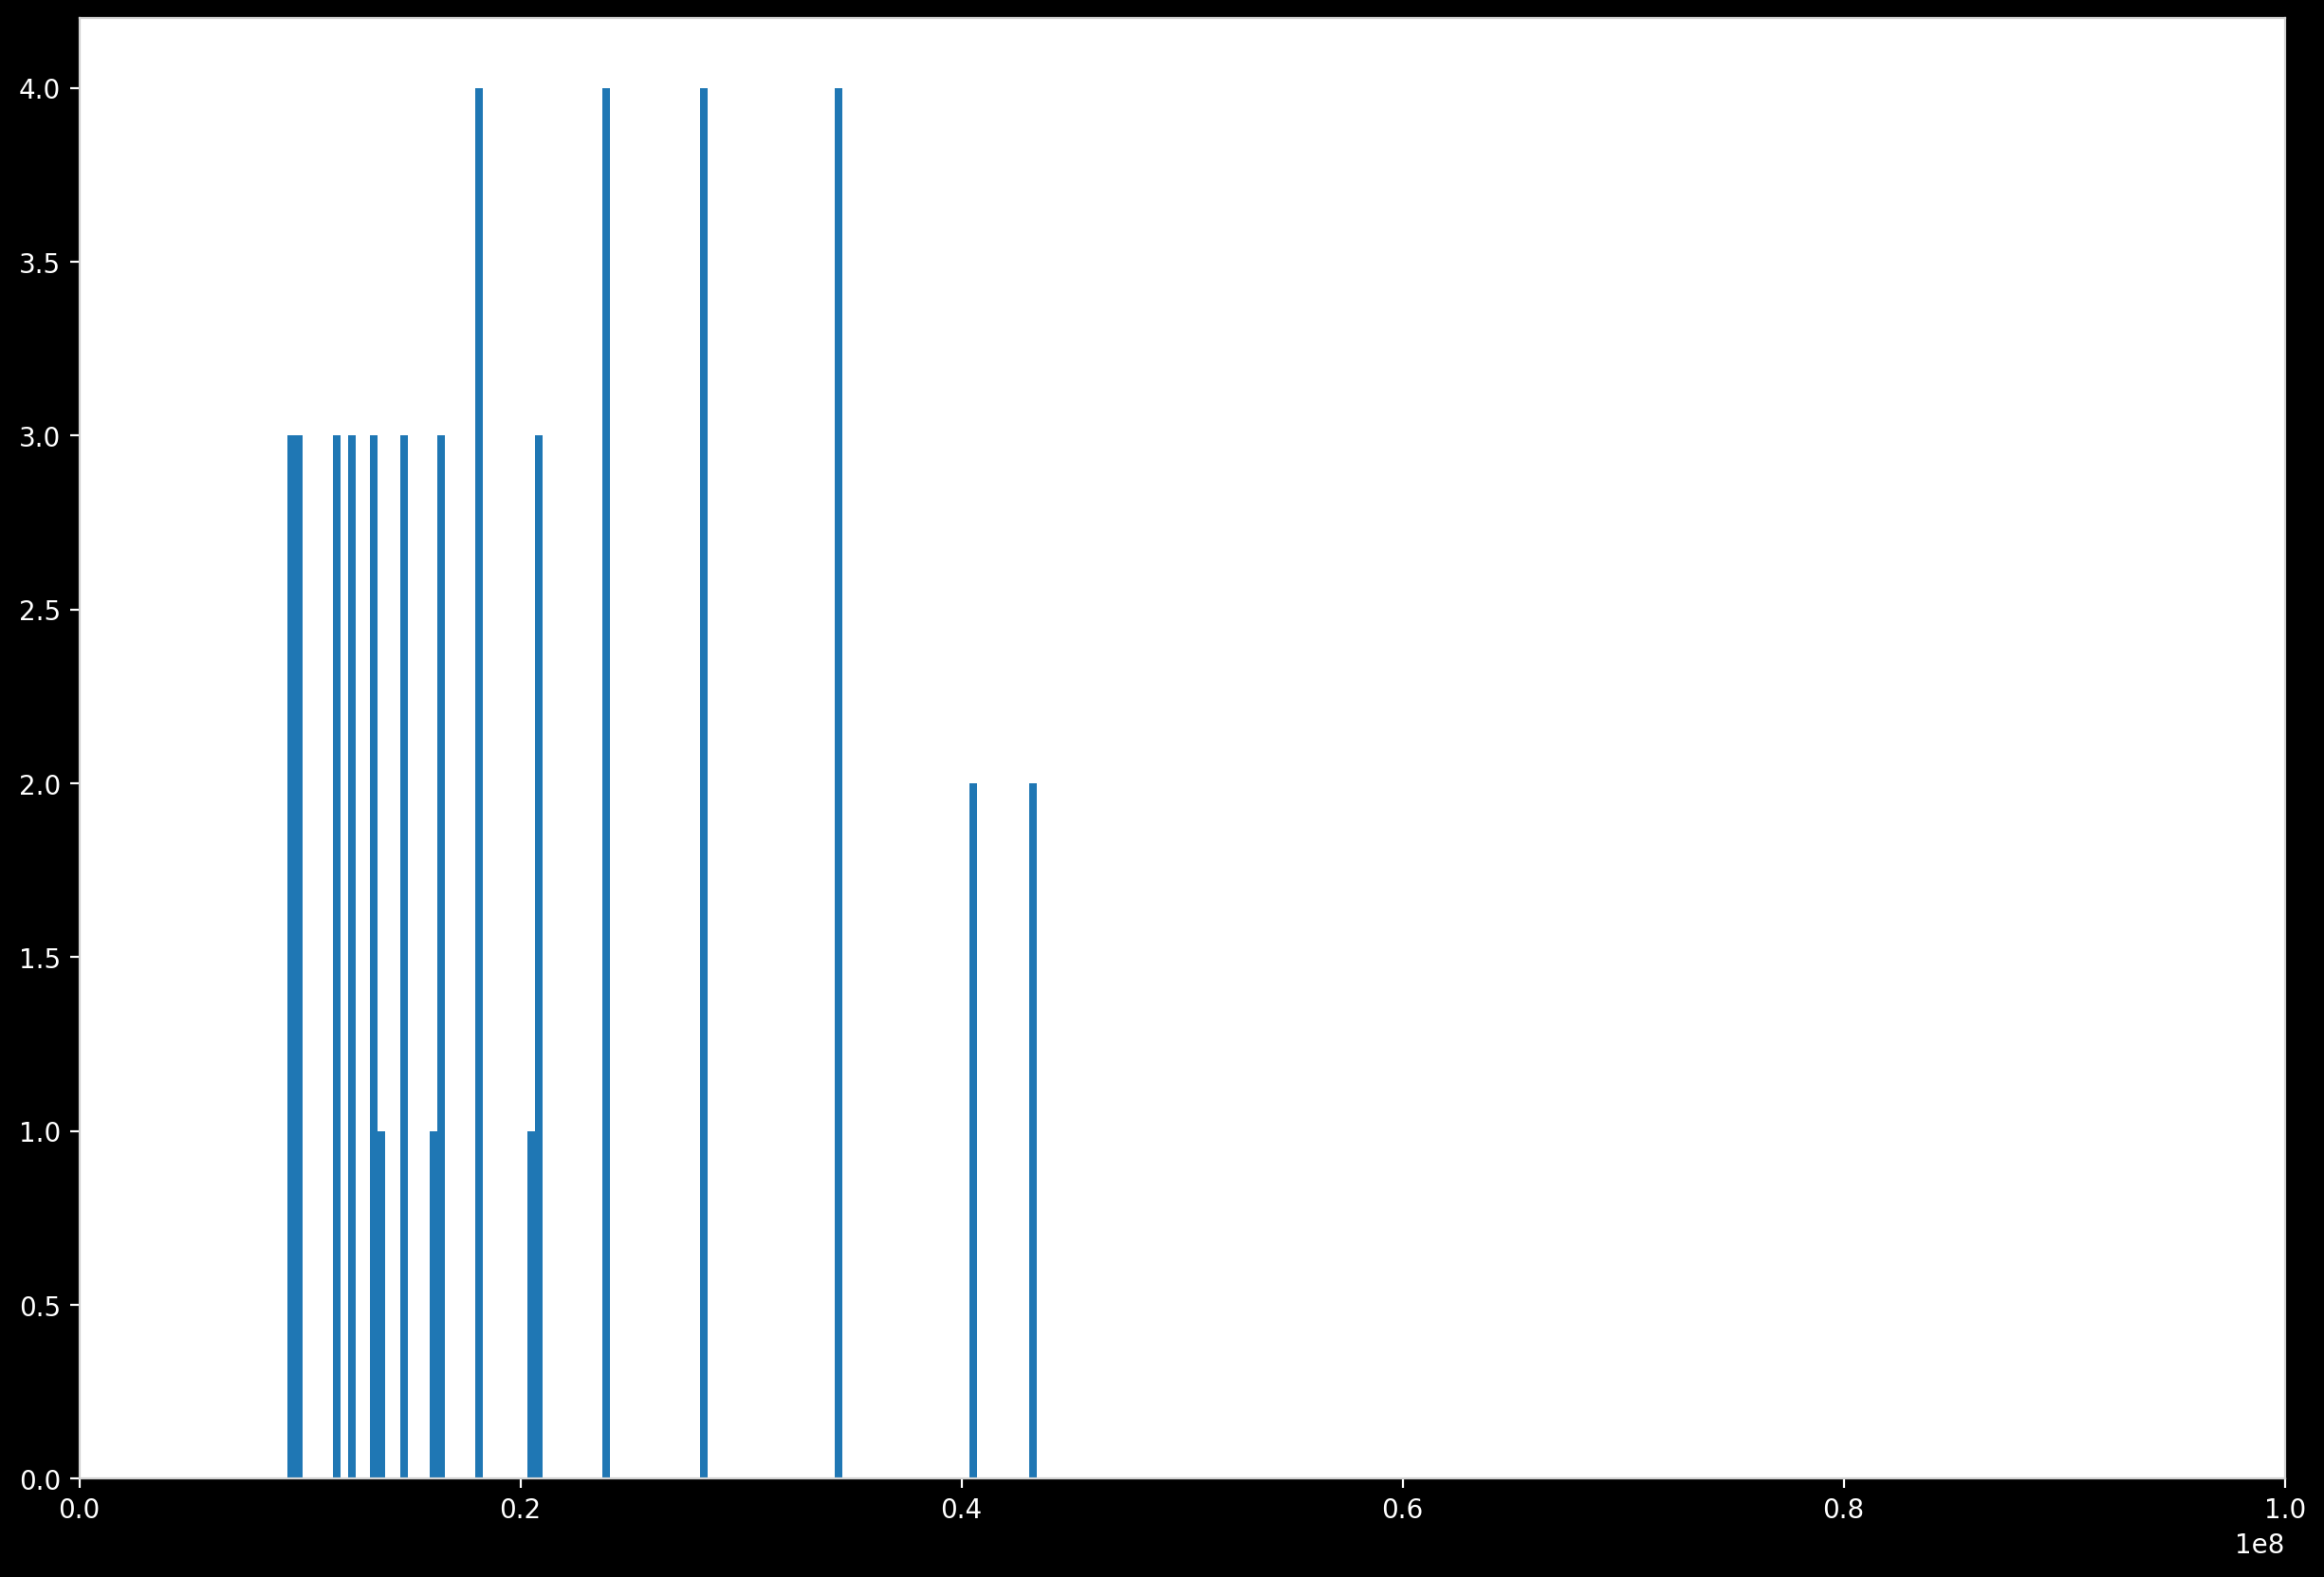

In [10]:
plt.hist(ages, bins=100)
plt.xlim(0, 1e8)

In [11]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),surface num_a (/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,20.0,-8.0,1.000000e-05,9.460200e+06,0.000010,5.212375e+05,4199.619138,1.471047e+16,0.000000e+00,0.000000e+00,0.000000e+00,4.639094e+18,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,94.0,20.0,-8.0,1.000000e+03,9.459200e+06,93.953230,8.132117e+05,4461.668192,2.213395e+19,0.000000e+00,0.000000e+00,0.000000e+00,6.558089e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,95.0,20.0,-8.0,1.112744e+03,9.459087e+06,112.743876,8.337625e+05,4113.061960,1.031299e+21,0.000000e+00,0.000000e+00,0.000000e+00,3.732354e+30,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
3,96.0,20.0,-8.0,1.231125e+03,9.458969e+06,118.381070,8.563834e+05,4119.436663,1.632812e+21,0.000000e+00,0.000000e+00,0.000000e+00,9.828076e+30,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,9.862887e-100
4,97.0,20.0,-8.0,1.355425e+03,9.458844e+06,124.300124,8.807176e+05,4128.504247,2.509249e+21,0.000000e+00,0.000000e+00,0.000000e+00,1.966415e+31,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.052289e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,796.0,20.0,-8.0,9.459921e+06,2.783740e+02,67.028600,1.332044e+08,15990.620881,4.857269e+38,4.161529e+33,4.582048e+23,6.499745e+29,7.739292e+52,4.877538e+44,5.791819e+33,0.001066,0.002930,0.001214,6.735862e-05
704,797.0,20.0,-8.0,9.459986e+06,2.137880e+02,64.586069,1.337969e+08,15838.527353,4.854394e+38,4.302577e+33,5.460587e+23,7.745974e+29,7.739391e+52,4.965172e+44,6.904024e+33,0.001066,0.002930,0.001214,6.736897e-05
705,798.0,20.0,-8.0,9.460054e+06,1.459726e+02,67.815372,1.342250e+08,15678.334951,4.851945e+38,4.456652e+33,6.407330e+23,9.088951e+29,7.739494e+52,5.060483e+44,8.274312e+33,0.001066,0.002930,0.001214,6.737943e-05
706,799.0,20.0,-8.0,9.460125e+06,7.476645e+01,71.206141,1.348875e+08,15509.373829,4.857899e+38,4.624828e+33,7.777247e+23,1.103221e+30,7.739604e+52,5.164336e+44,1.002074e+34,0.001066,0.002930,0.001214,6.738952e-05


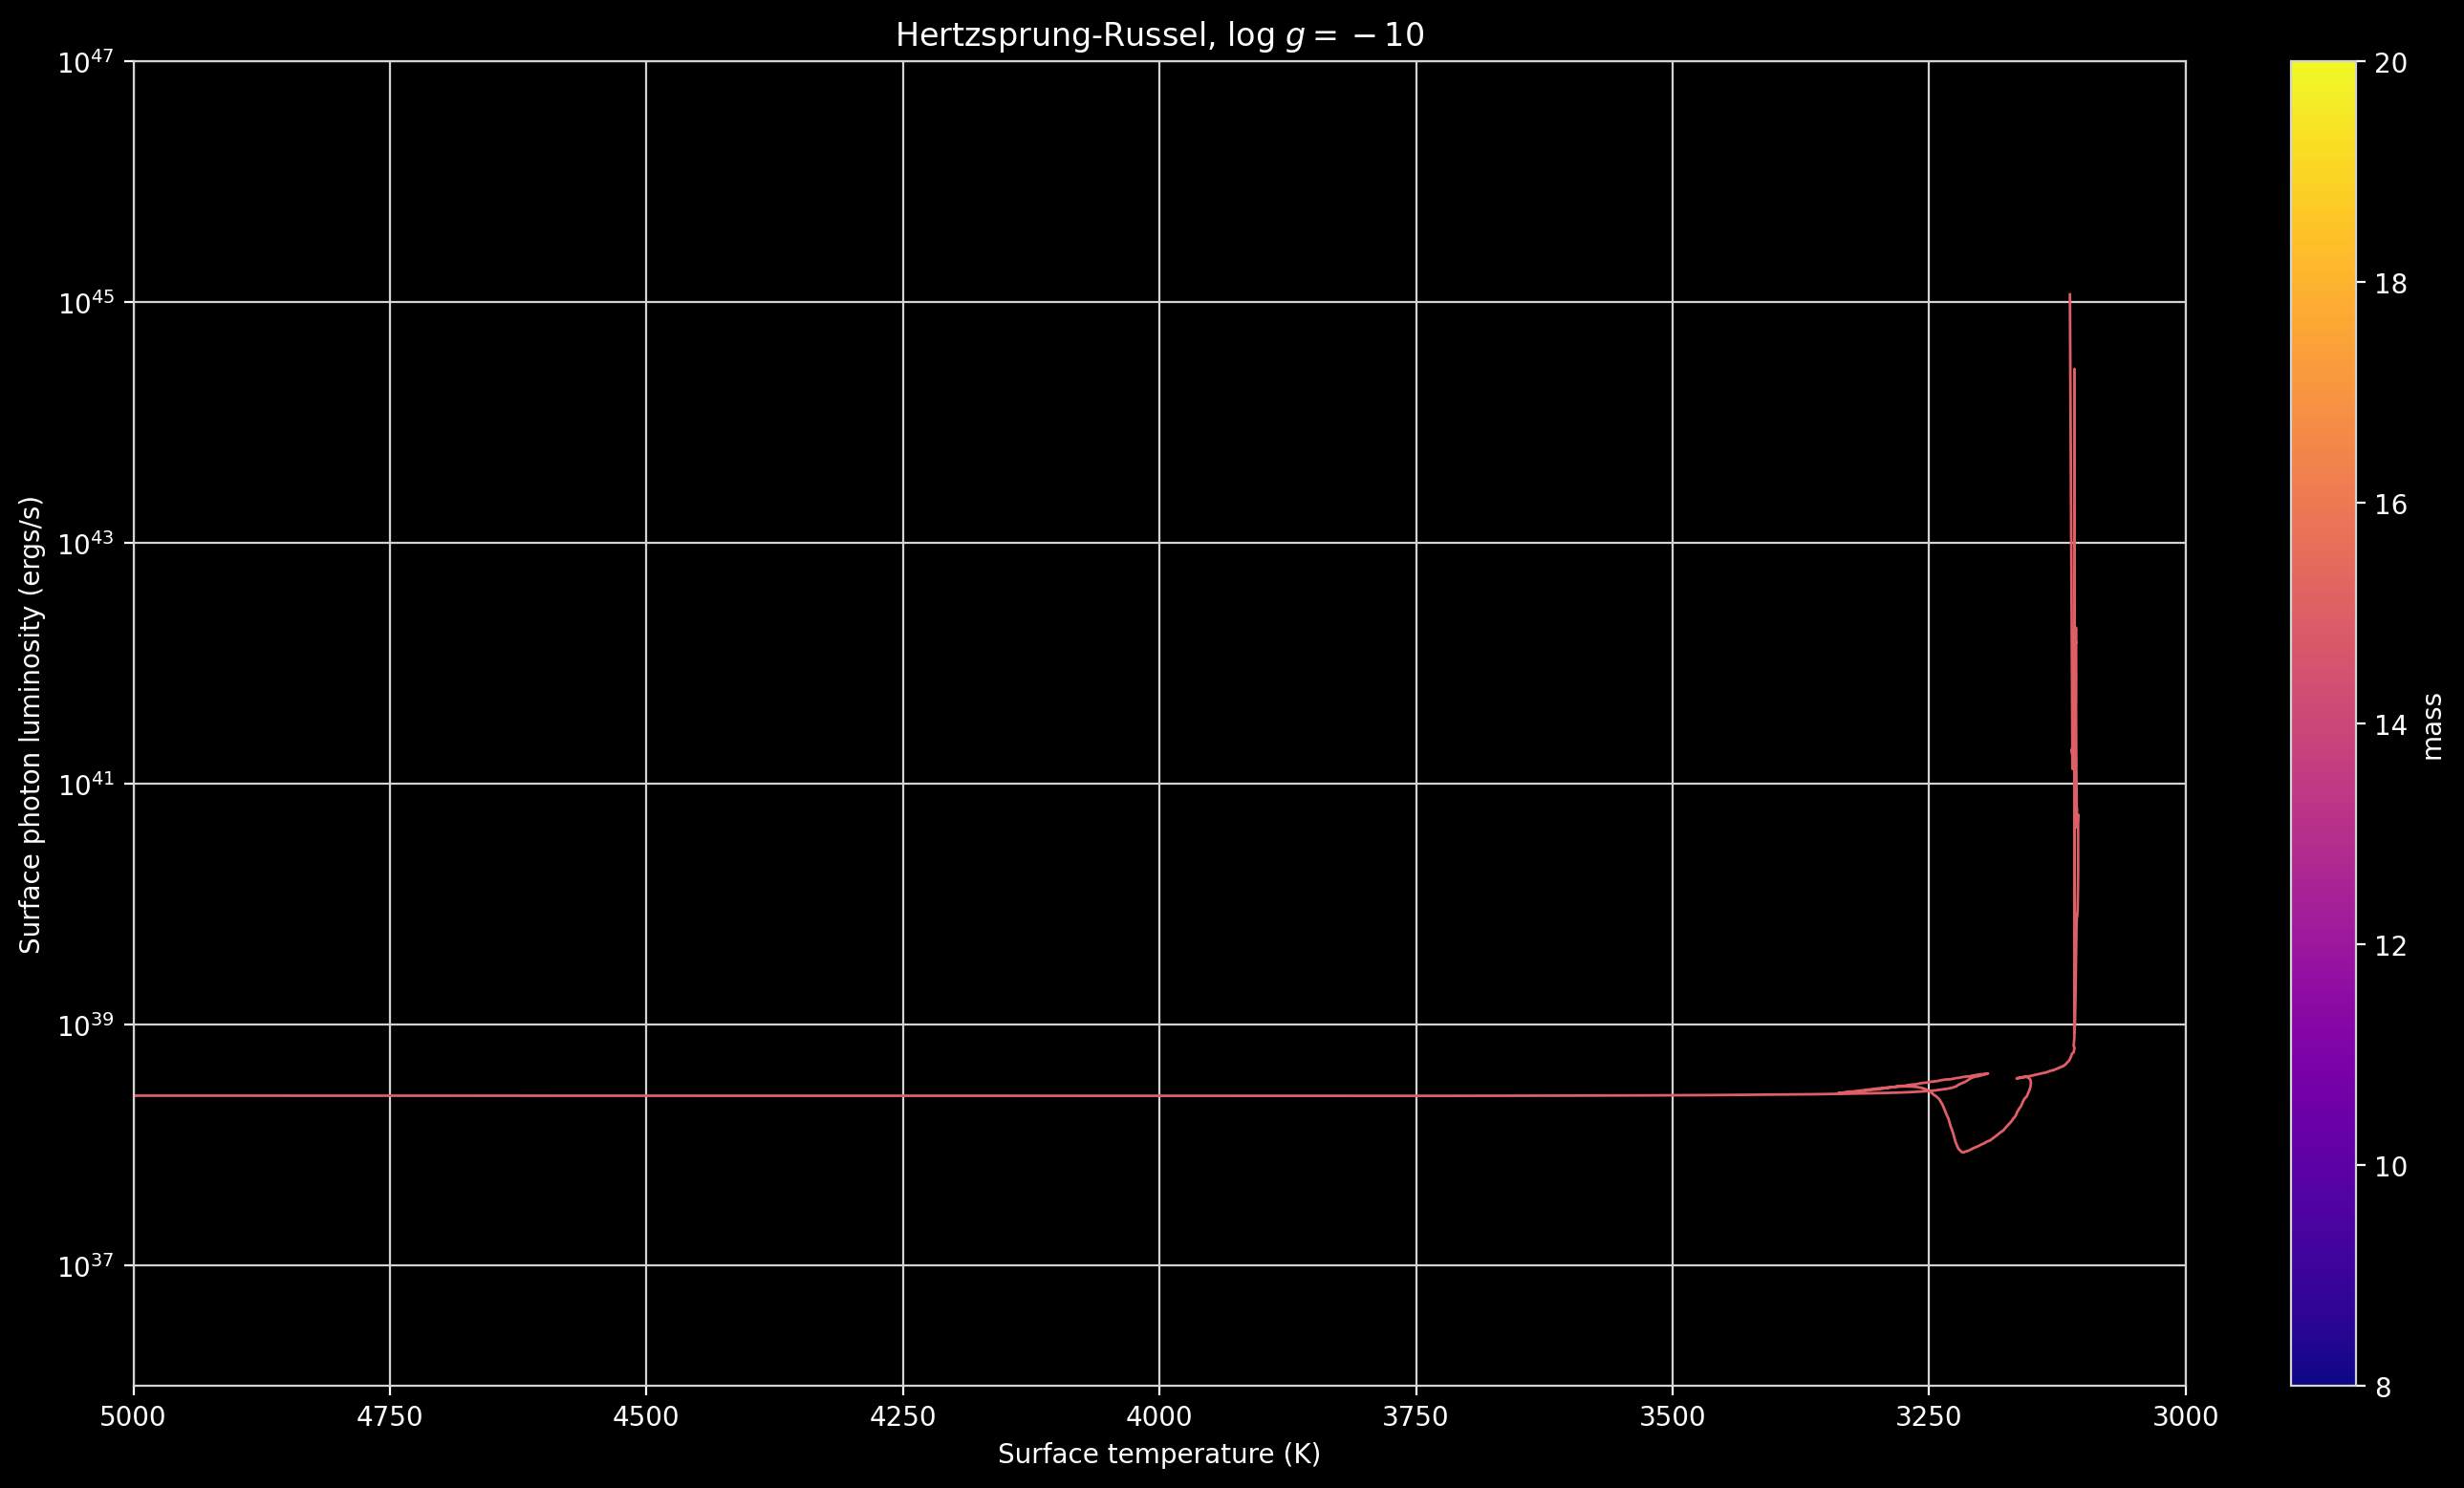

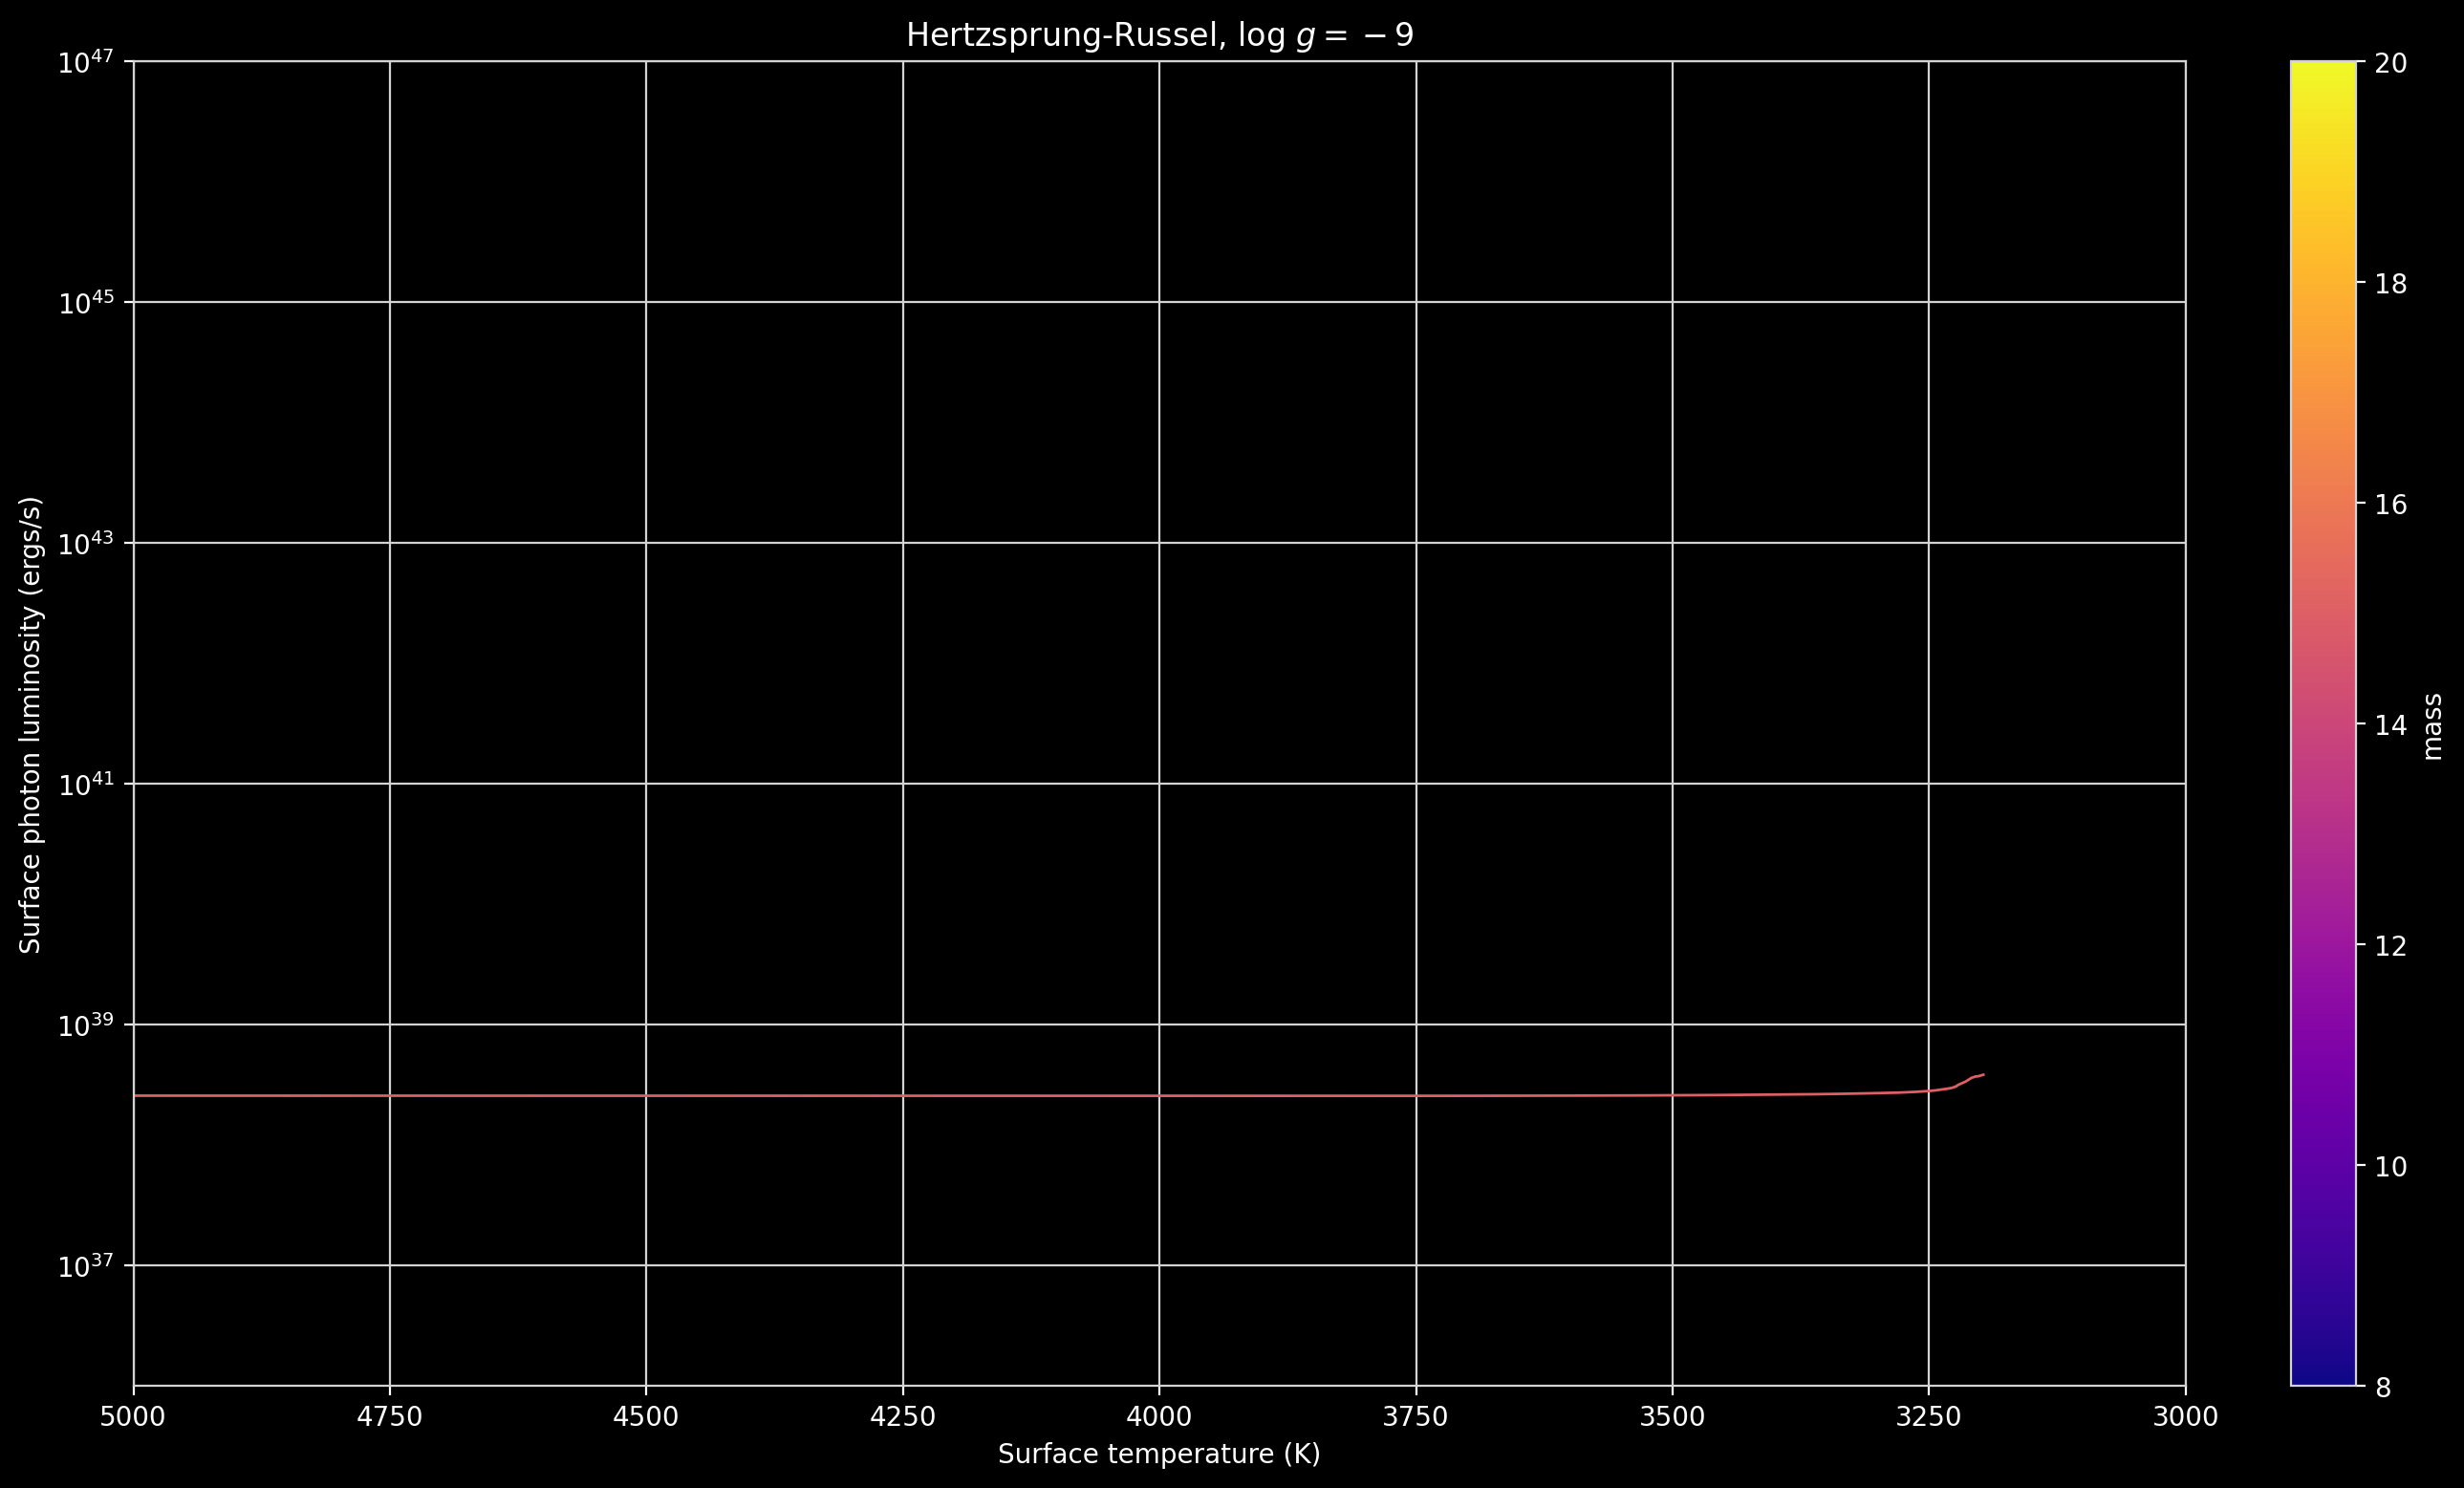

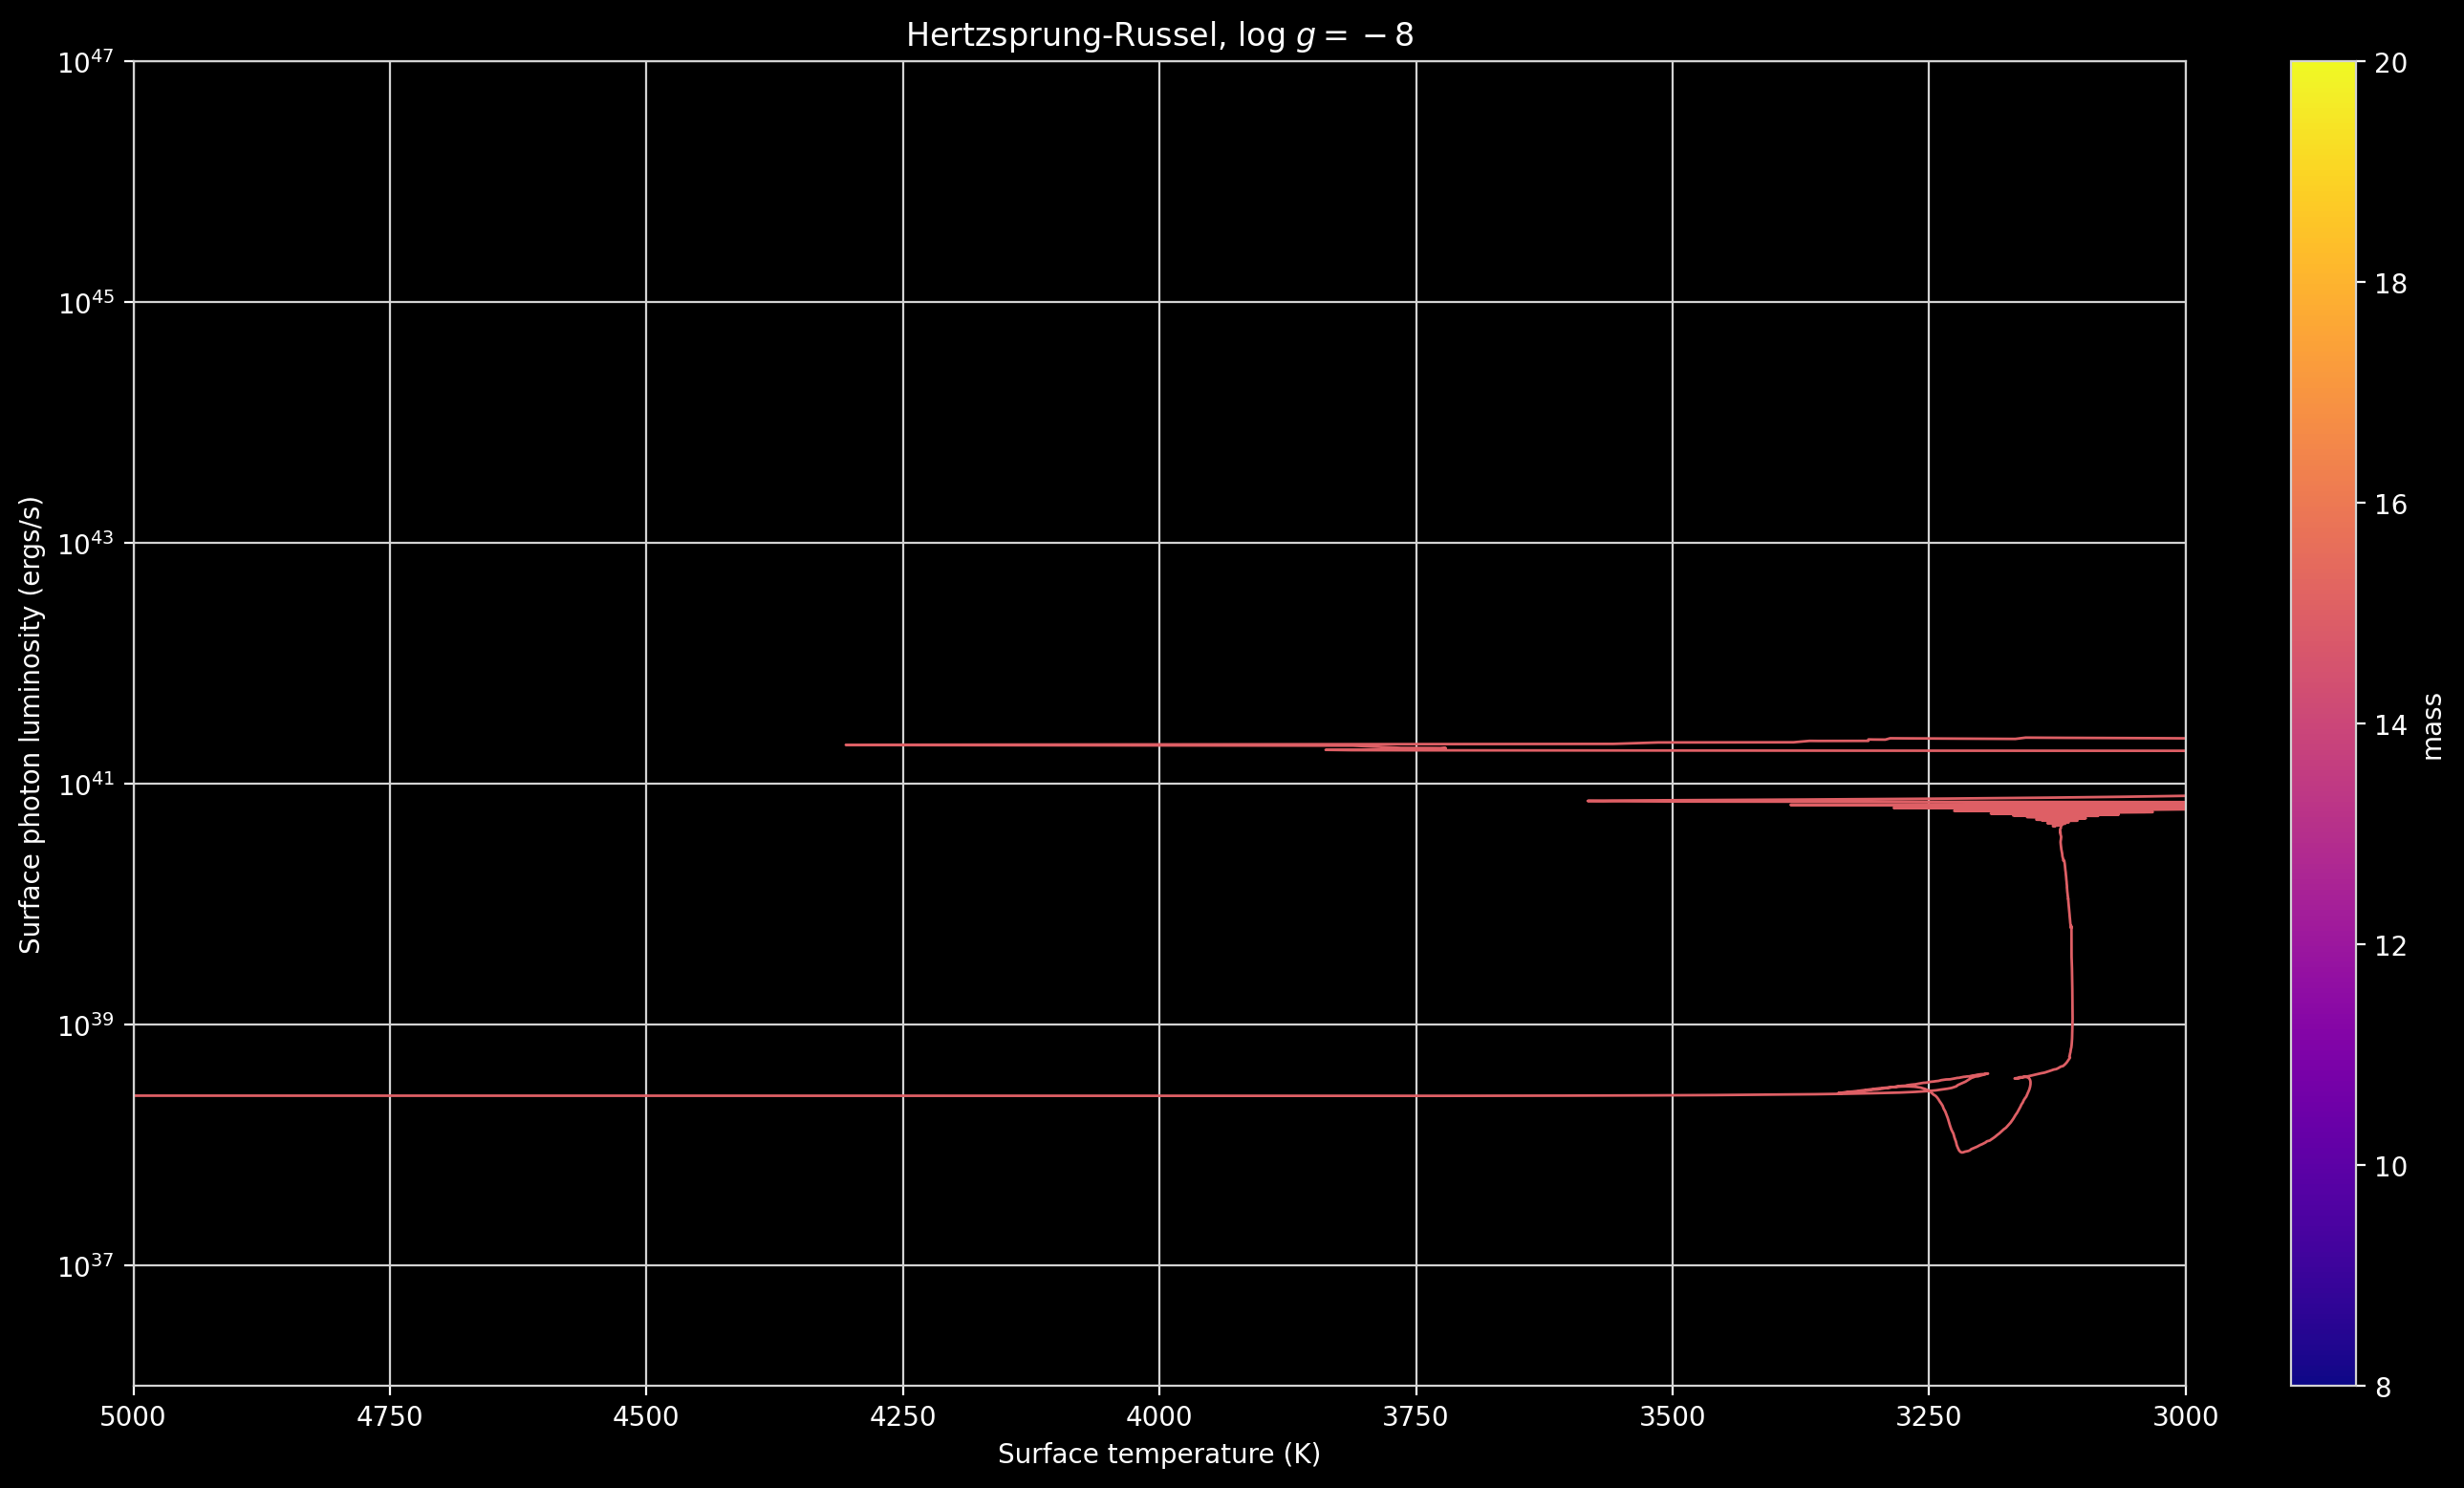

In [23]:
for G in [-10, -9, -8]:
    fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                            gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                           )
    main_ax.set_facecolor('black')
    fig.colorbar(colormap_m, label='mass', cax=color_ax)
    ###
    
    plt.sca(main_ax)
    main_ax.set_yscale('log')
    # main_ax.set_xscale('log')
    # plt.ylim(1e33, 1e36)
    
    M = [15]
    
    for key in reversed(runs):
        run = runs[key]
        mass = run['mass (Msun)'][0]
        g = run['coupling'][0]
        if g != G or mass not in M: continue
        x = np.array(run['effective T (K)'])
        y = np.array(run['surface lum_gamma (ergs/s)'])
        Tend = np.array(run['core T (K)'])[-1]
        plt.plot(x, y, c=colormap_m.to_rgba(mass), lw=1)
        # plt.plot(x, y, c=('red' if Tend < Tcut else 'blue'))
    
    plt.xlabel('Surface temperature (K)')
    plt.ylabel('Surface photon luminosity (ergs/s)')
    plt.xlim(5e3, 3e3)
    plt.ylim(1e36, 1e47)
    plt.grid()
    
    plt.title(f'Hertzsprung-Russel, log $g = {G}$', c='white')
    plt.savefig('evol/track_' + str(G) + '.png')
    # plt.legend()
    plt.show()

m08.0_g-10.00
m09.0_g-10.00
m10.0_g-10.00
m11.0_g-10.00
m12.0_g-10.00
m13.0_g-10.00
m14.0_g-10.00
m15.0_g-10.00
m16.0_g-10.00
m17.0_g-10.00
m18.0_g-10.00
m19.0_g-10.00
m20.0_g-10.00


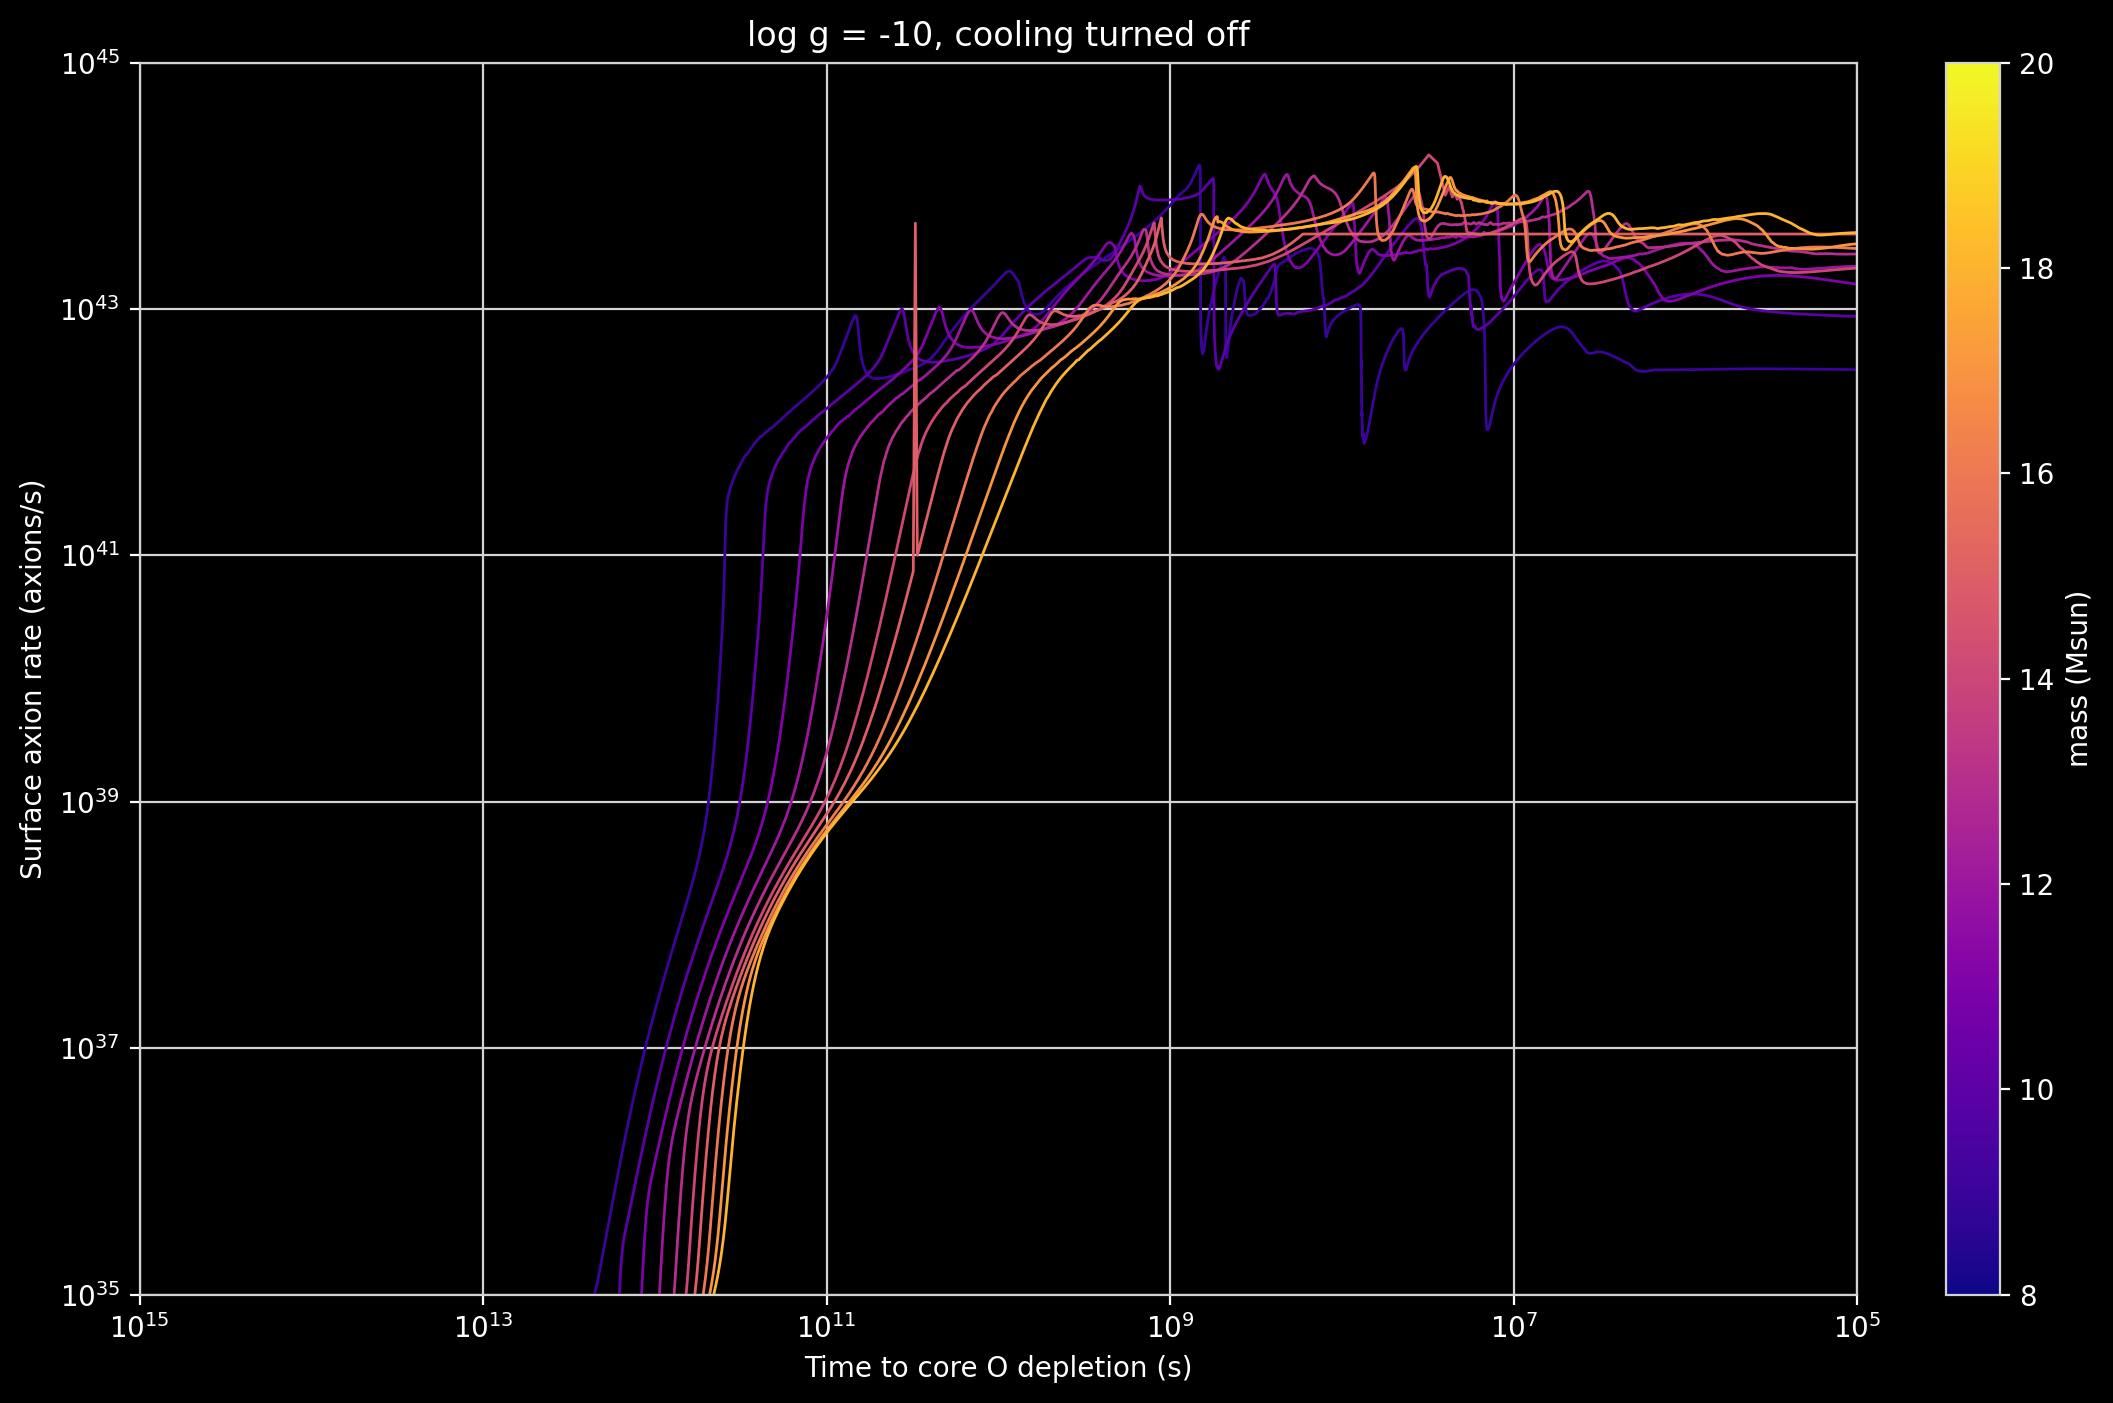

In [13]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(12, 8), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_m, label='mass (Msun)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['time to core O depletion (years)']) * 3.154e+7
    print(key)
    y = np.array(run['surface num_a (/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_m.to_rgba(mass))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e35, 1e45)
plt.xlim(1e15, 1e5)
plt.xlabel('Time to core O depletion (s)')
plt.ylabel('Surface axion rate (axions/s)')
plt.grid()

plt.title('log g = -10, cooling turned off', c='white')
# plt.legend()
plt.show()

2.306613106100561e+59 -6.566077448858006


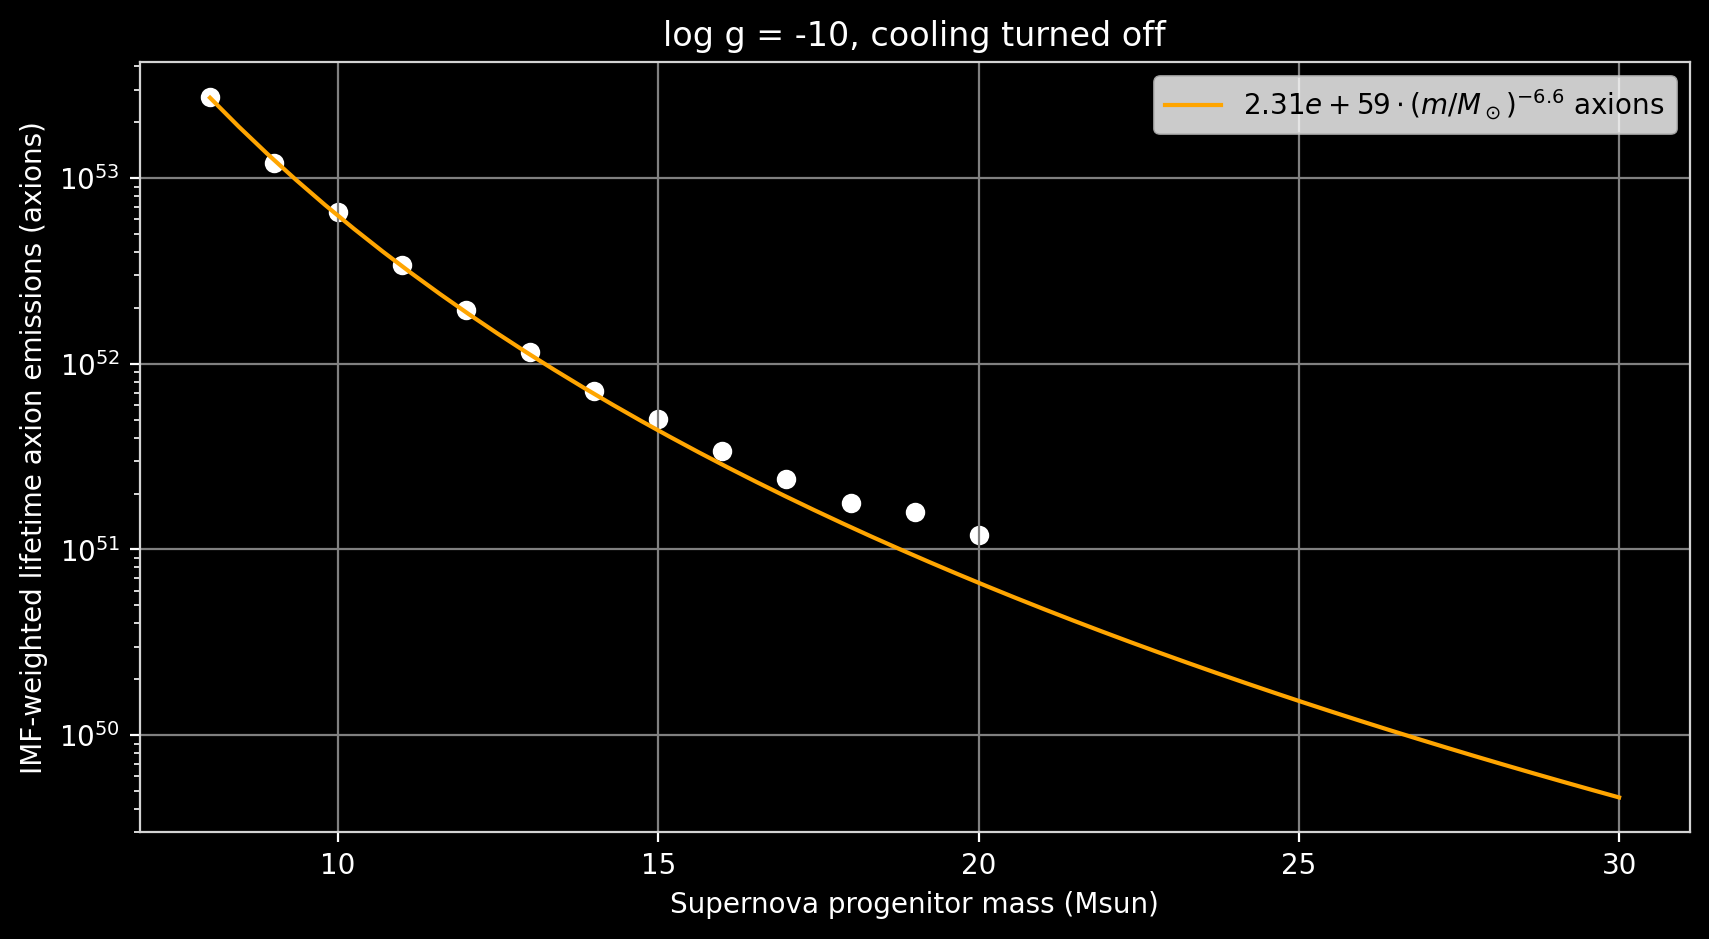

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('black')

###

ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

masses = []
rates = []
for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    masses.append(mass)
    dt = np.array(run['dt (years)'])
    n = np.array(run['surface num_a (/s)'])
    rate = np.sum(dt * n * 3.154e+7)
    # rate = np.sum(dt * n)/np.sum(dt)
    rate *= mass**-2.35 / 0.0447191427629
    rates.append(rate)

masses = np.array(masses)
rates = np.array(rates)

from scipy.optimize import curve_fit
def expfit(x, a, b): 
    return a * (x**b)
[ a, b ], pcov = curve_fit(expfit, masses[masses<15], rates[masses<15], p0=[1e53, -1])
print(a,b)
plt.plot(np.linspace(8, 30), expfit(np.linspace(8, 30), a, b), label=f"${a:.2e}\cdot (m/M_\odot)^{{{b:.1f}}}$ axions", color='orange')
plt.scatter(masses, rates, color='white')

# plt.ylim(1e20, 1e50)
# plt.xlim(8, 25)
plt.xlabel('Supernova progenitor mass (Msun)')
plt.ylabel('IMF-weighted lifetime axion emissions (axions)')
plt.grid(color='gray')
# plt.ylim(0, 2e54)

plt.title('log g = -10, cooling turned off', c='white')
plt.legend()
# plt.show()

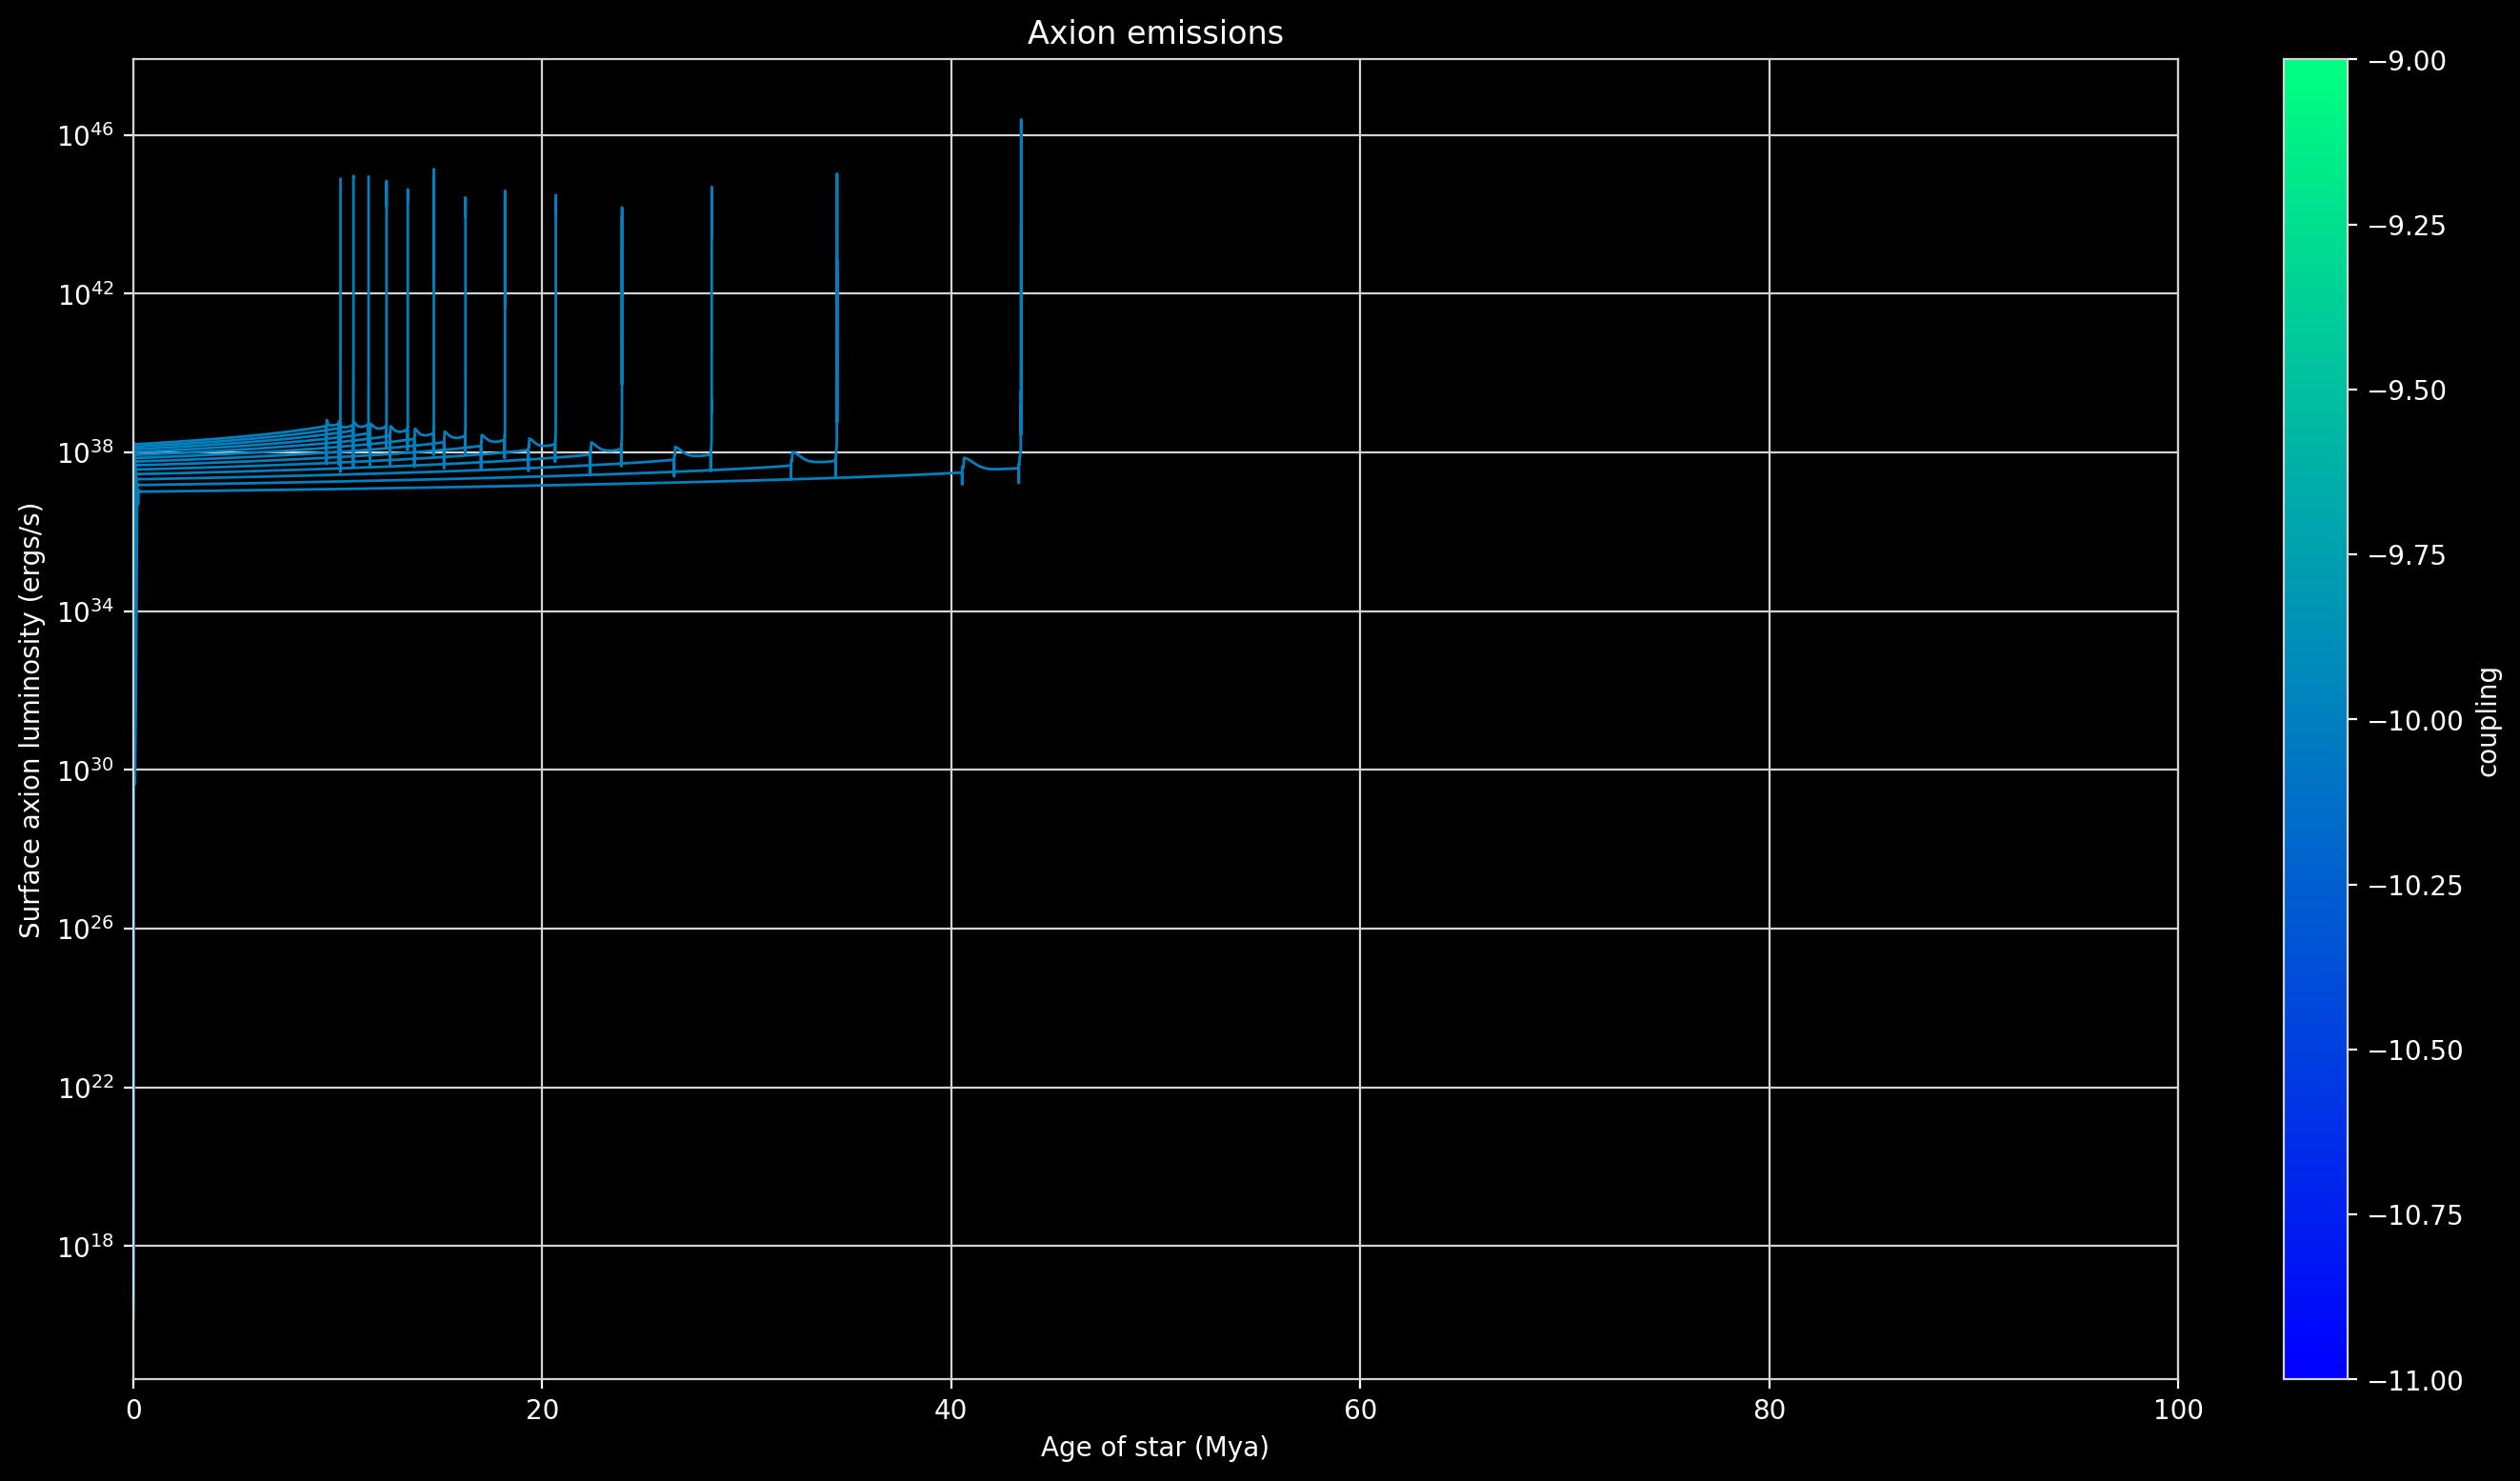

In [55]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in reversed(runs):
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

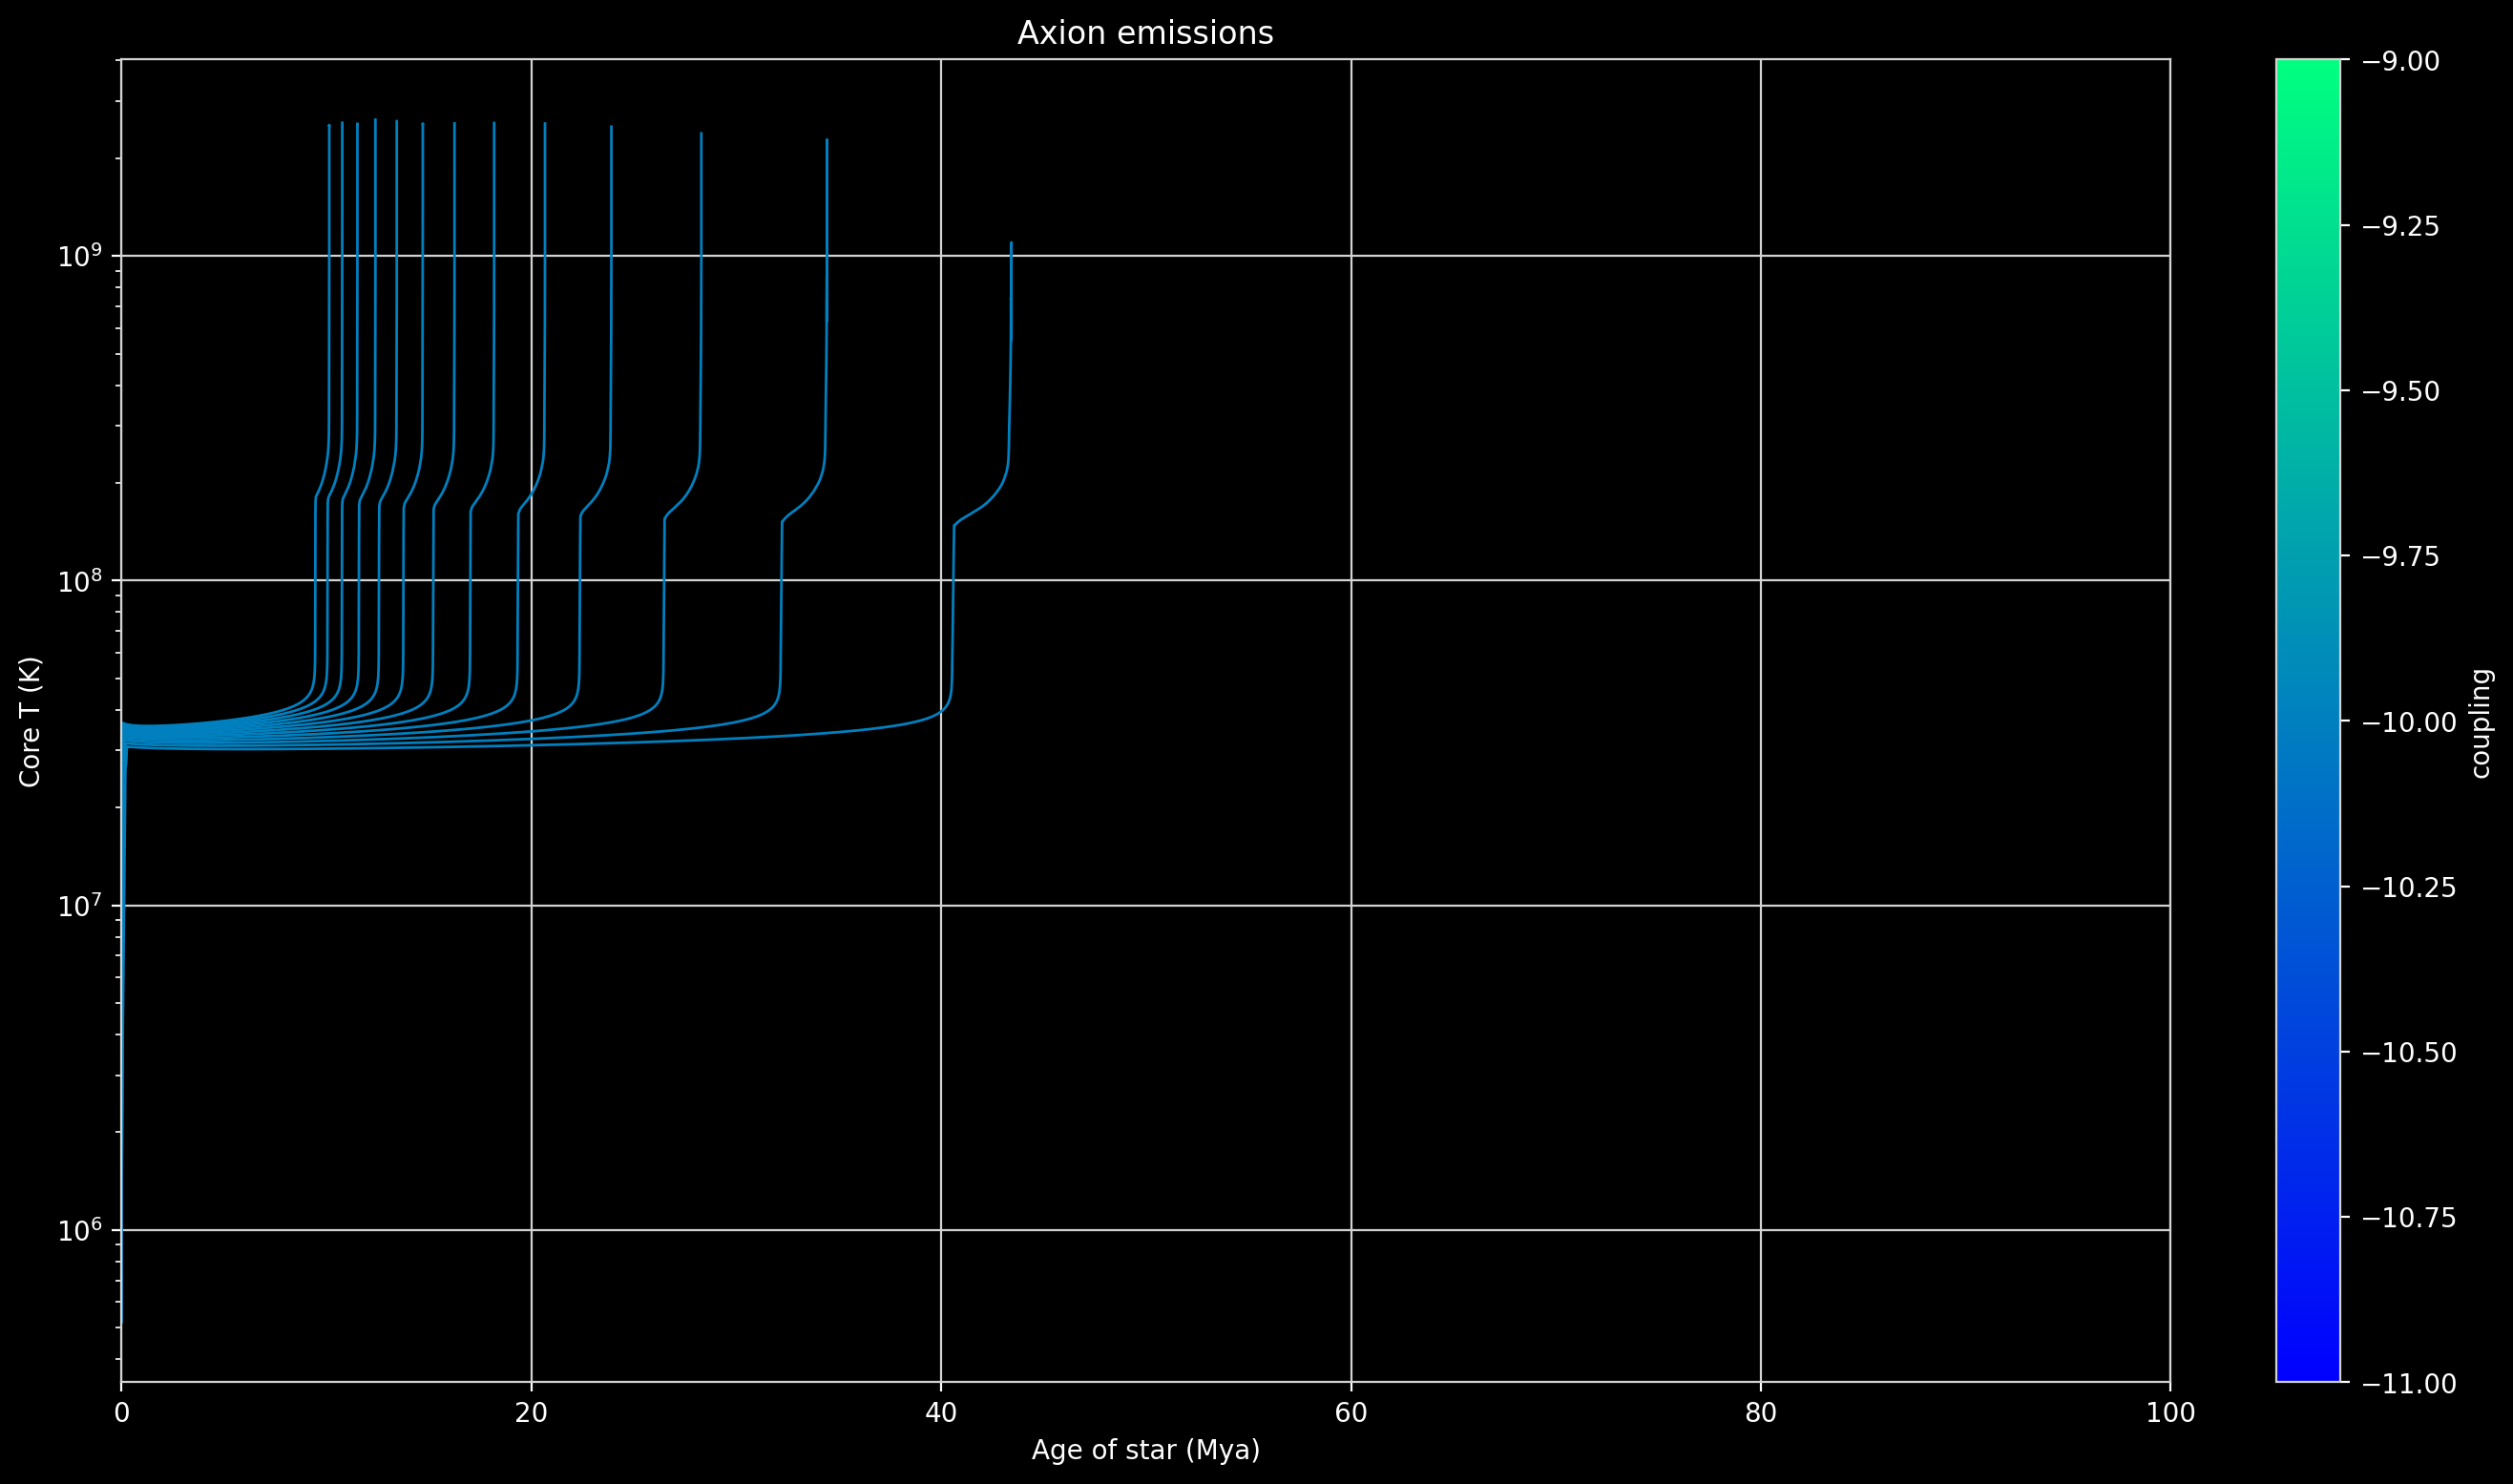

In [56]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)
###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['core T (K)'])
    # plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(1 if np.array(run['core T (K)'])[-1] < Tcut else 2), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Core T (K)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

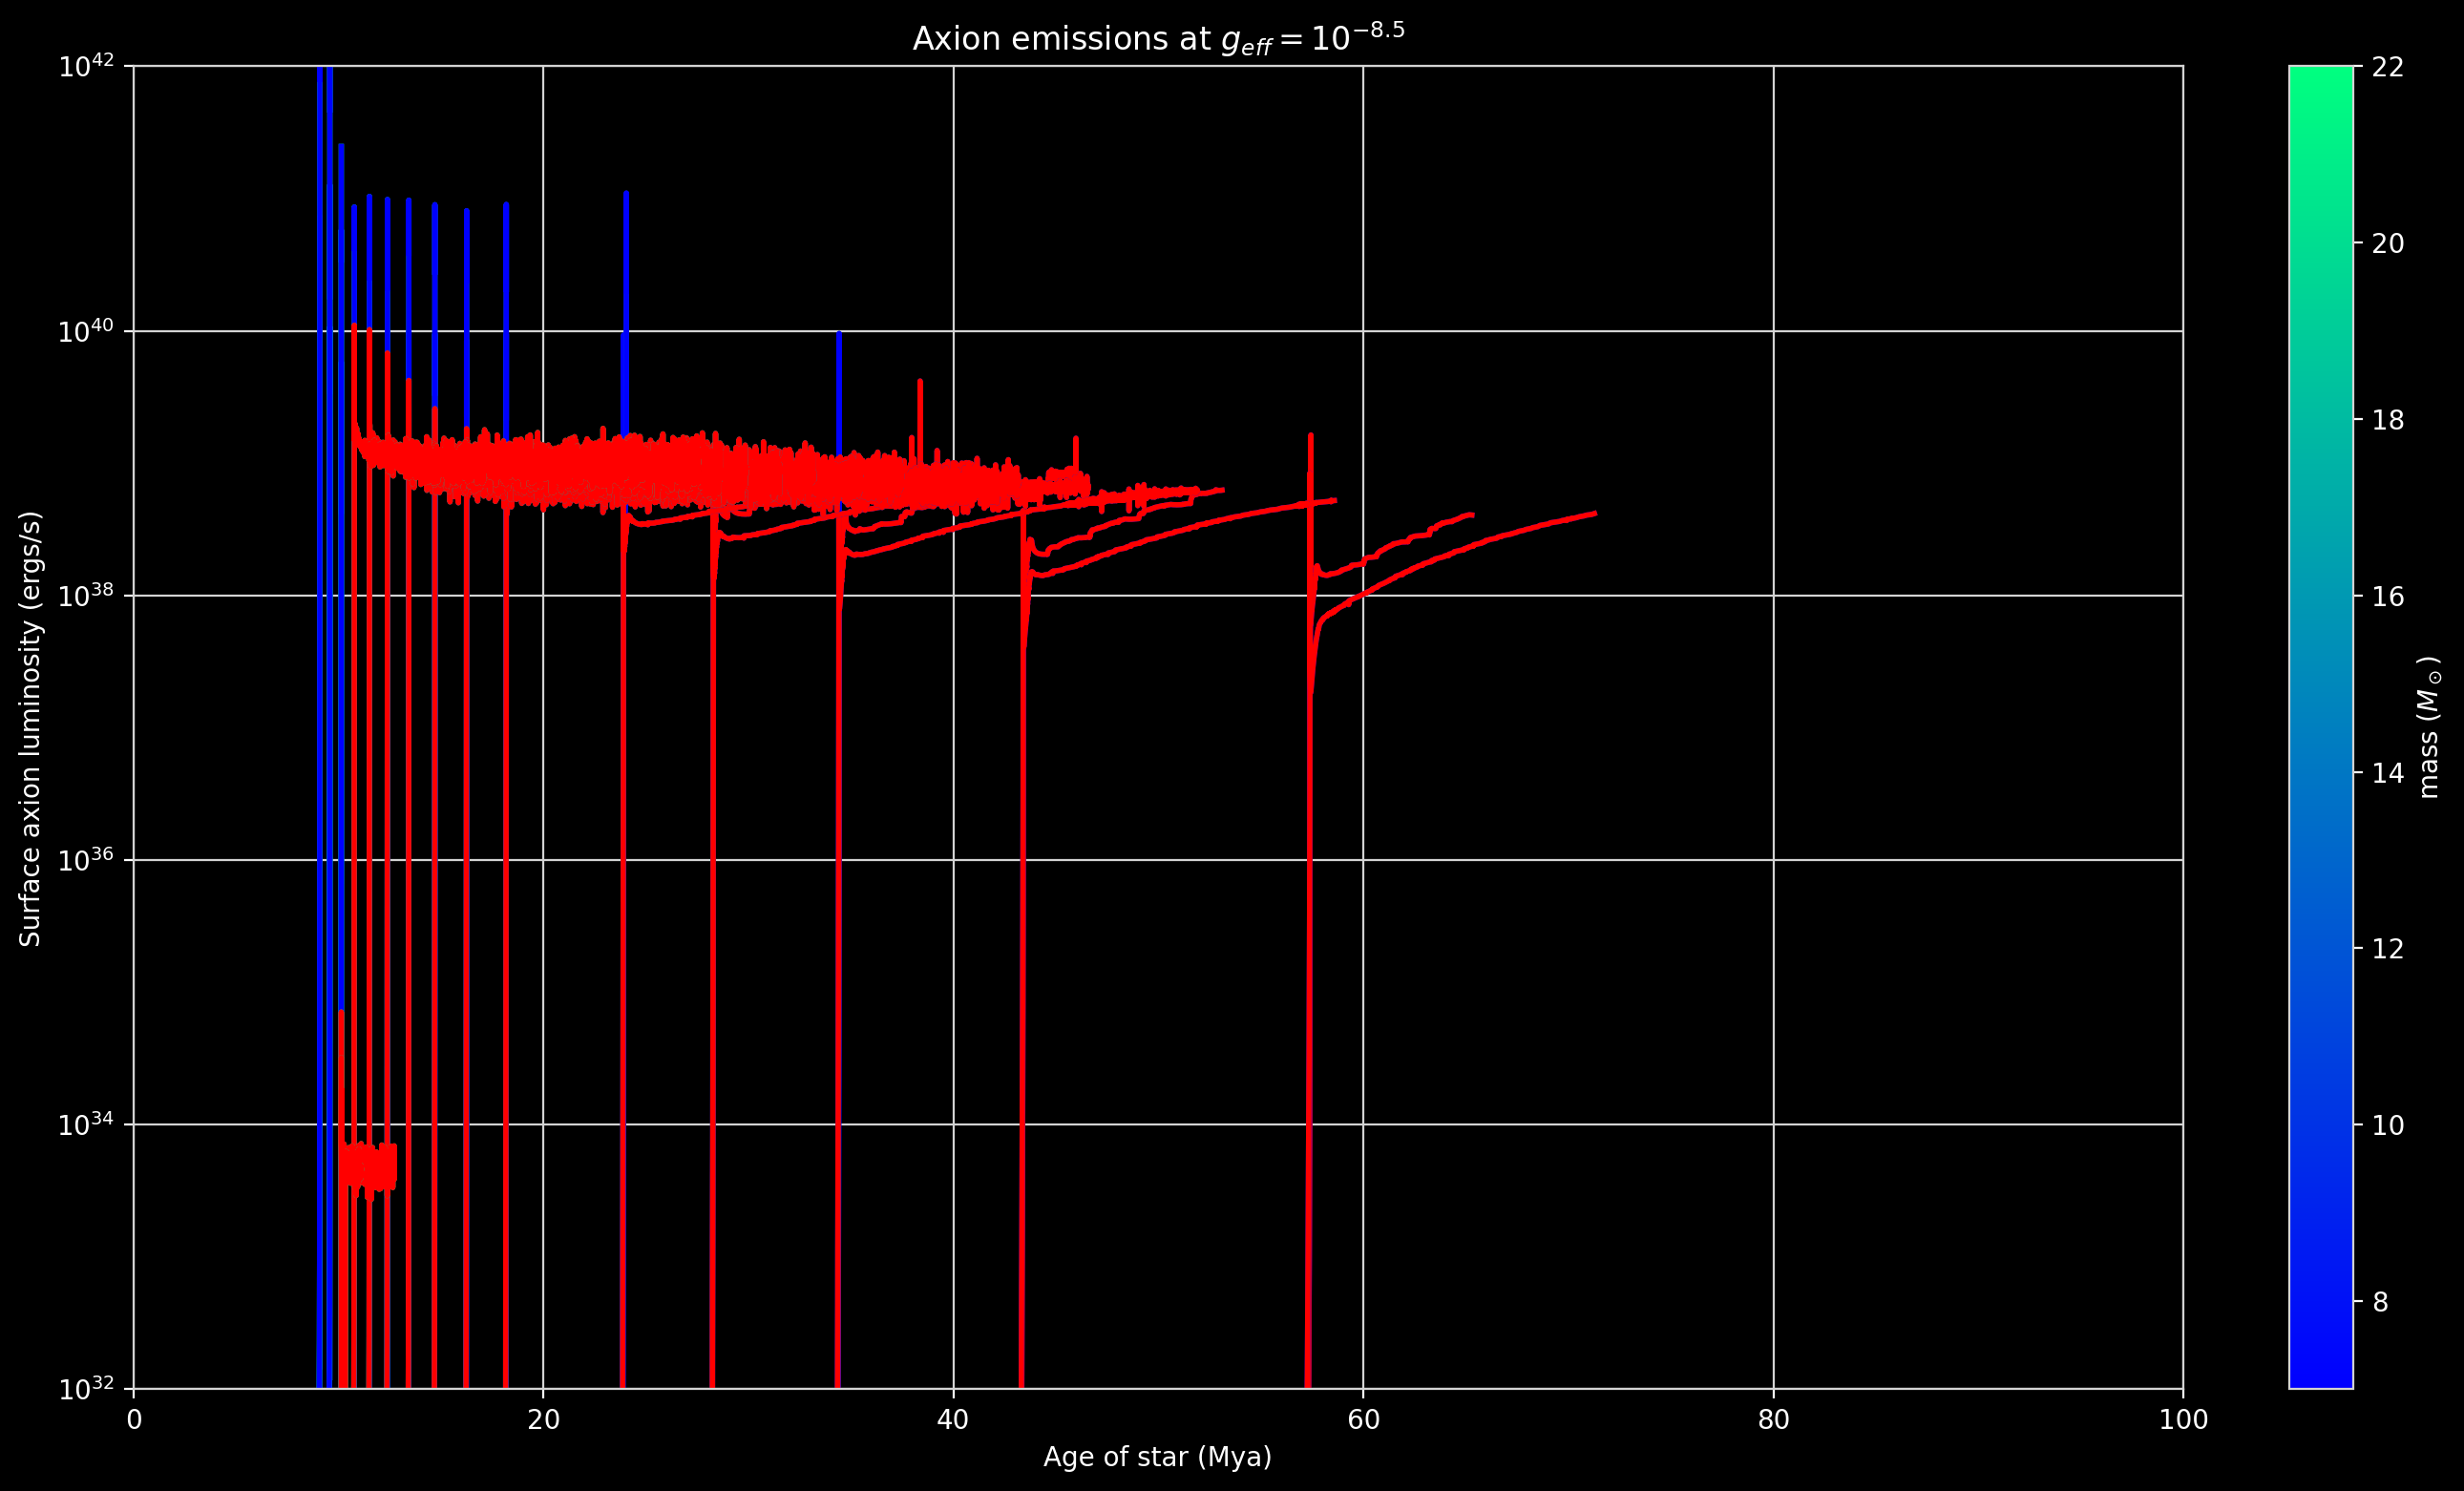

In [13]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_a (ergs/s)'])
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

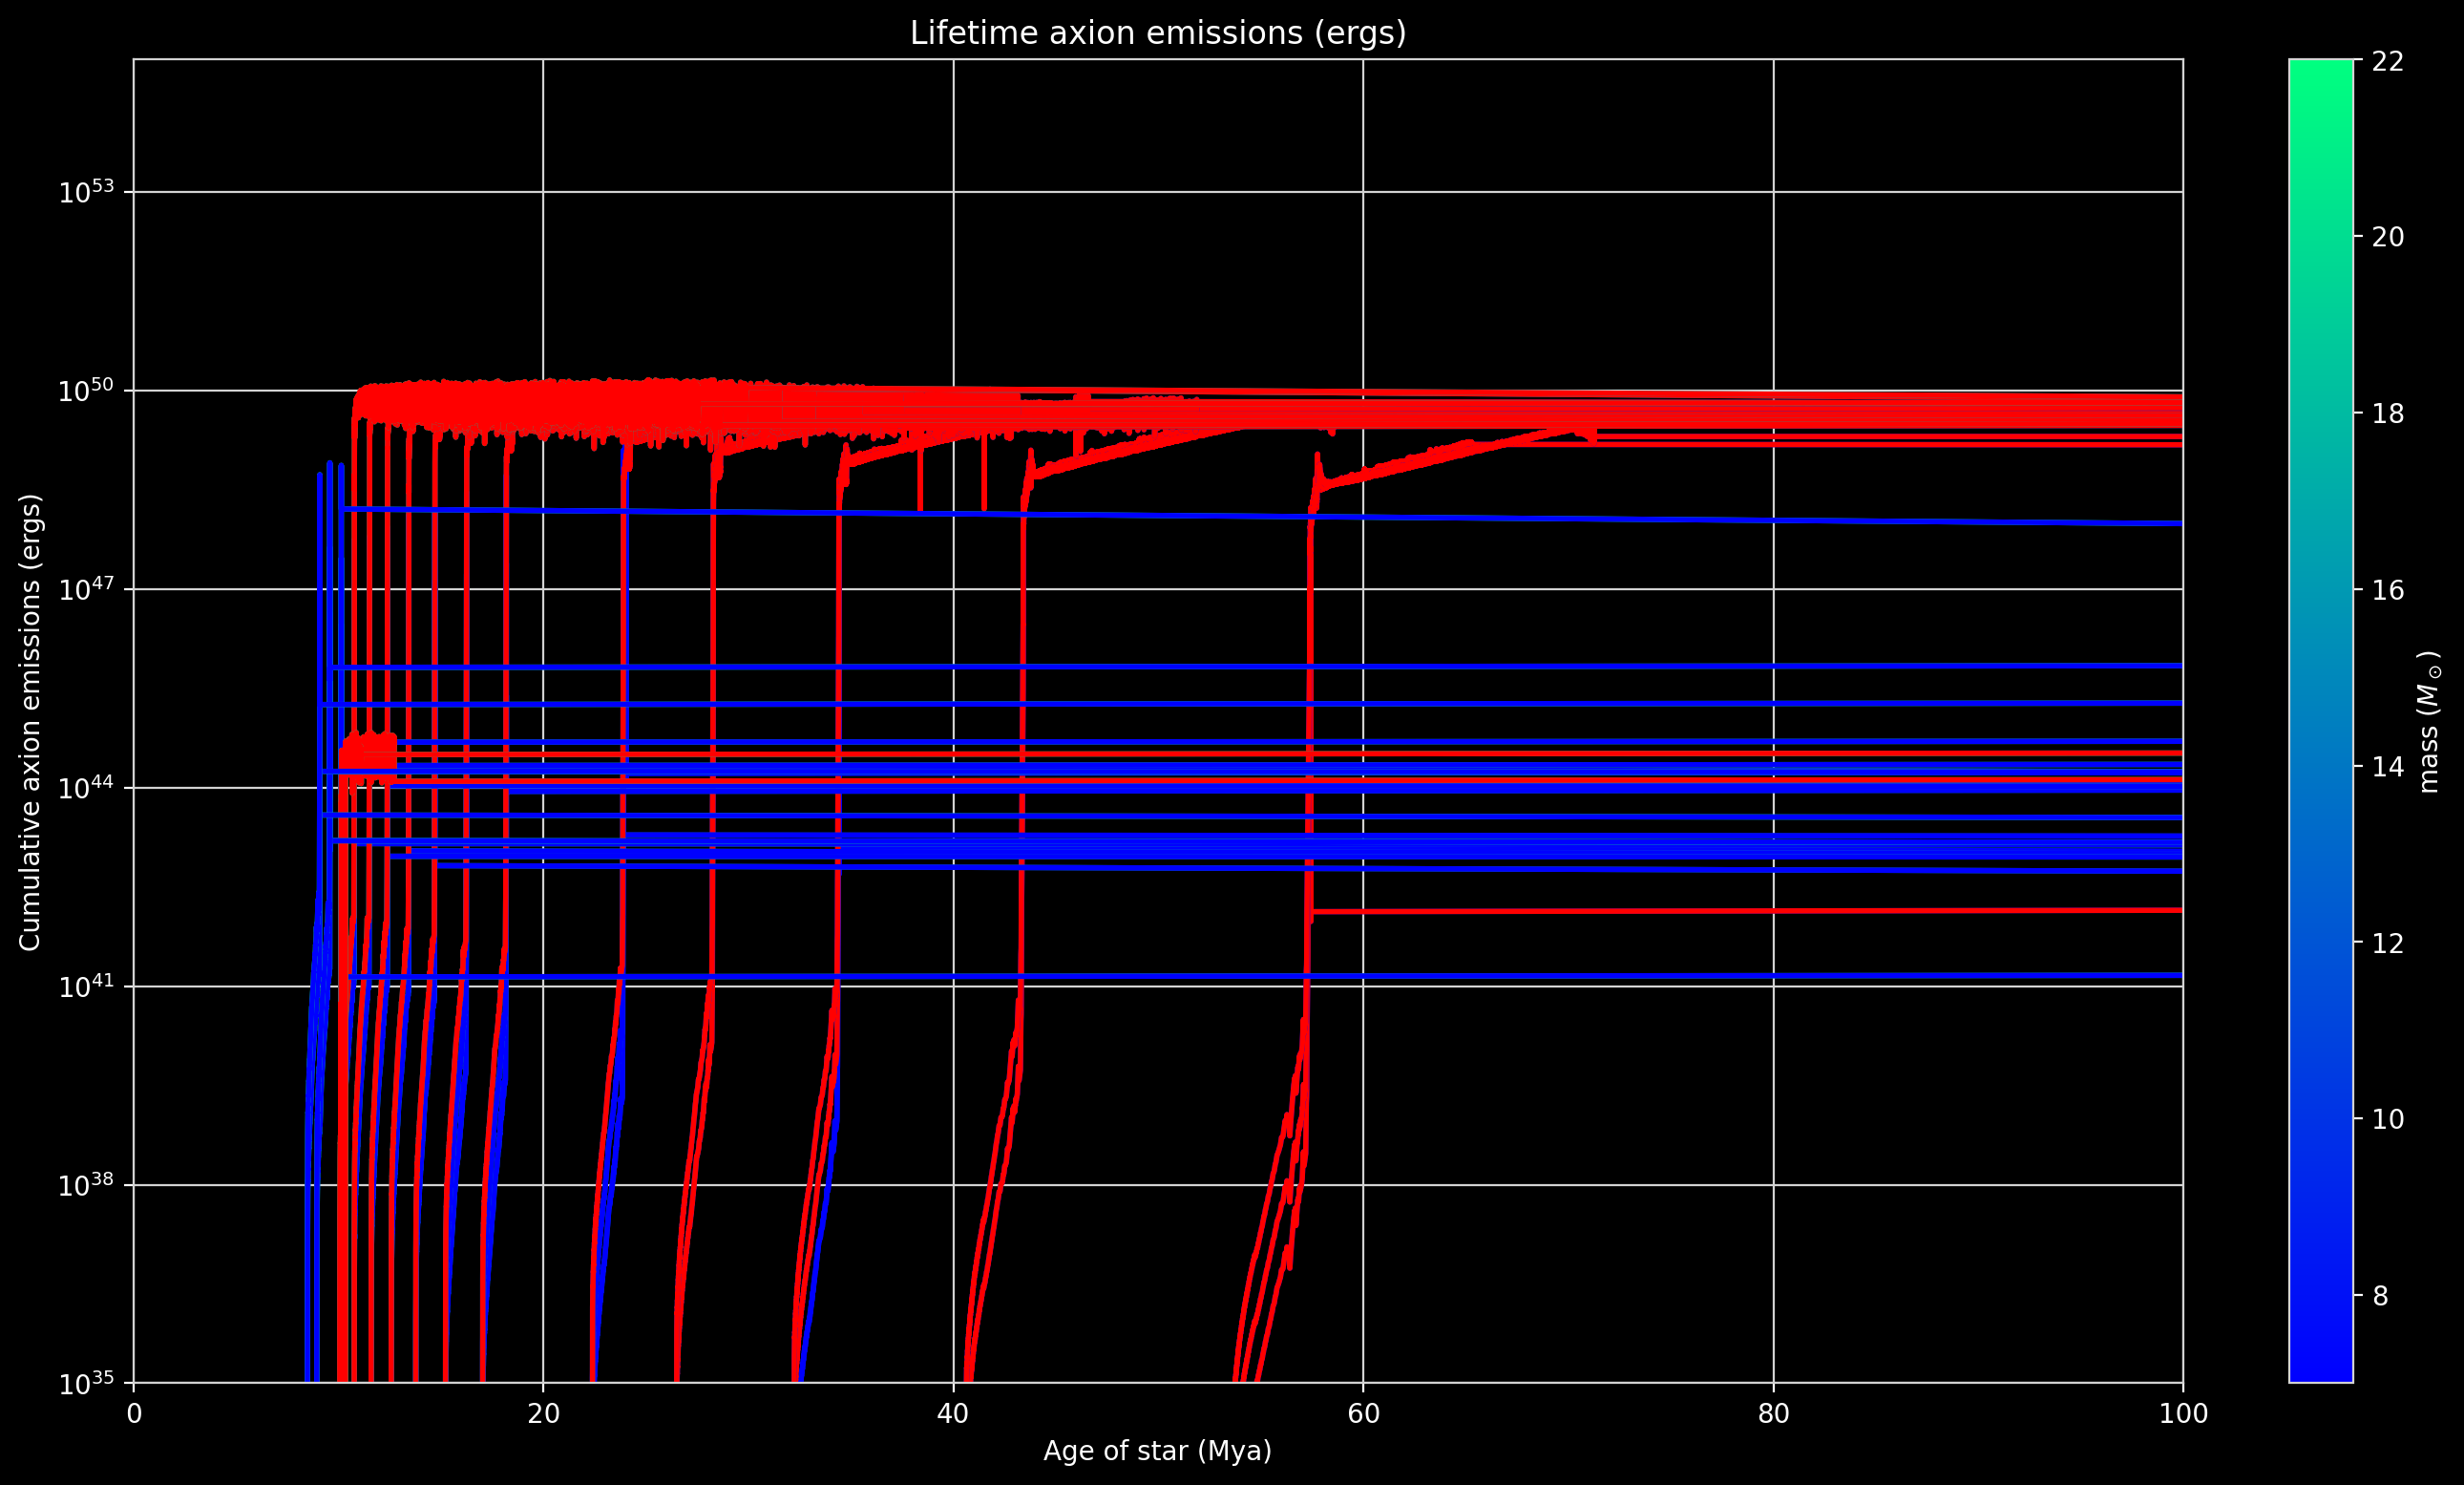

In [23]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    x[-1] = 100
    y = np.array(run['surface lum_a (ergs/s)'] * run['dt (years)'] * 3.154e+7)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e35, 1e55)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Cumulative axion emissions (ergs)')
plt.grid()

plt.title('Lifetime axion emissions (ergs)', c='white')
# plt.legend()
plt.show()

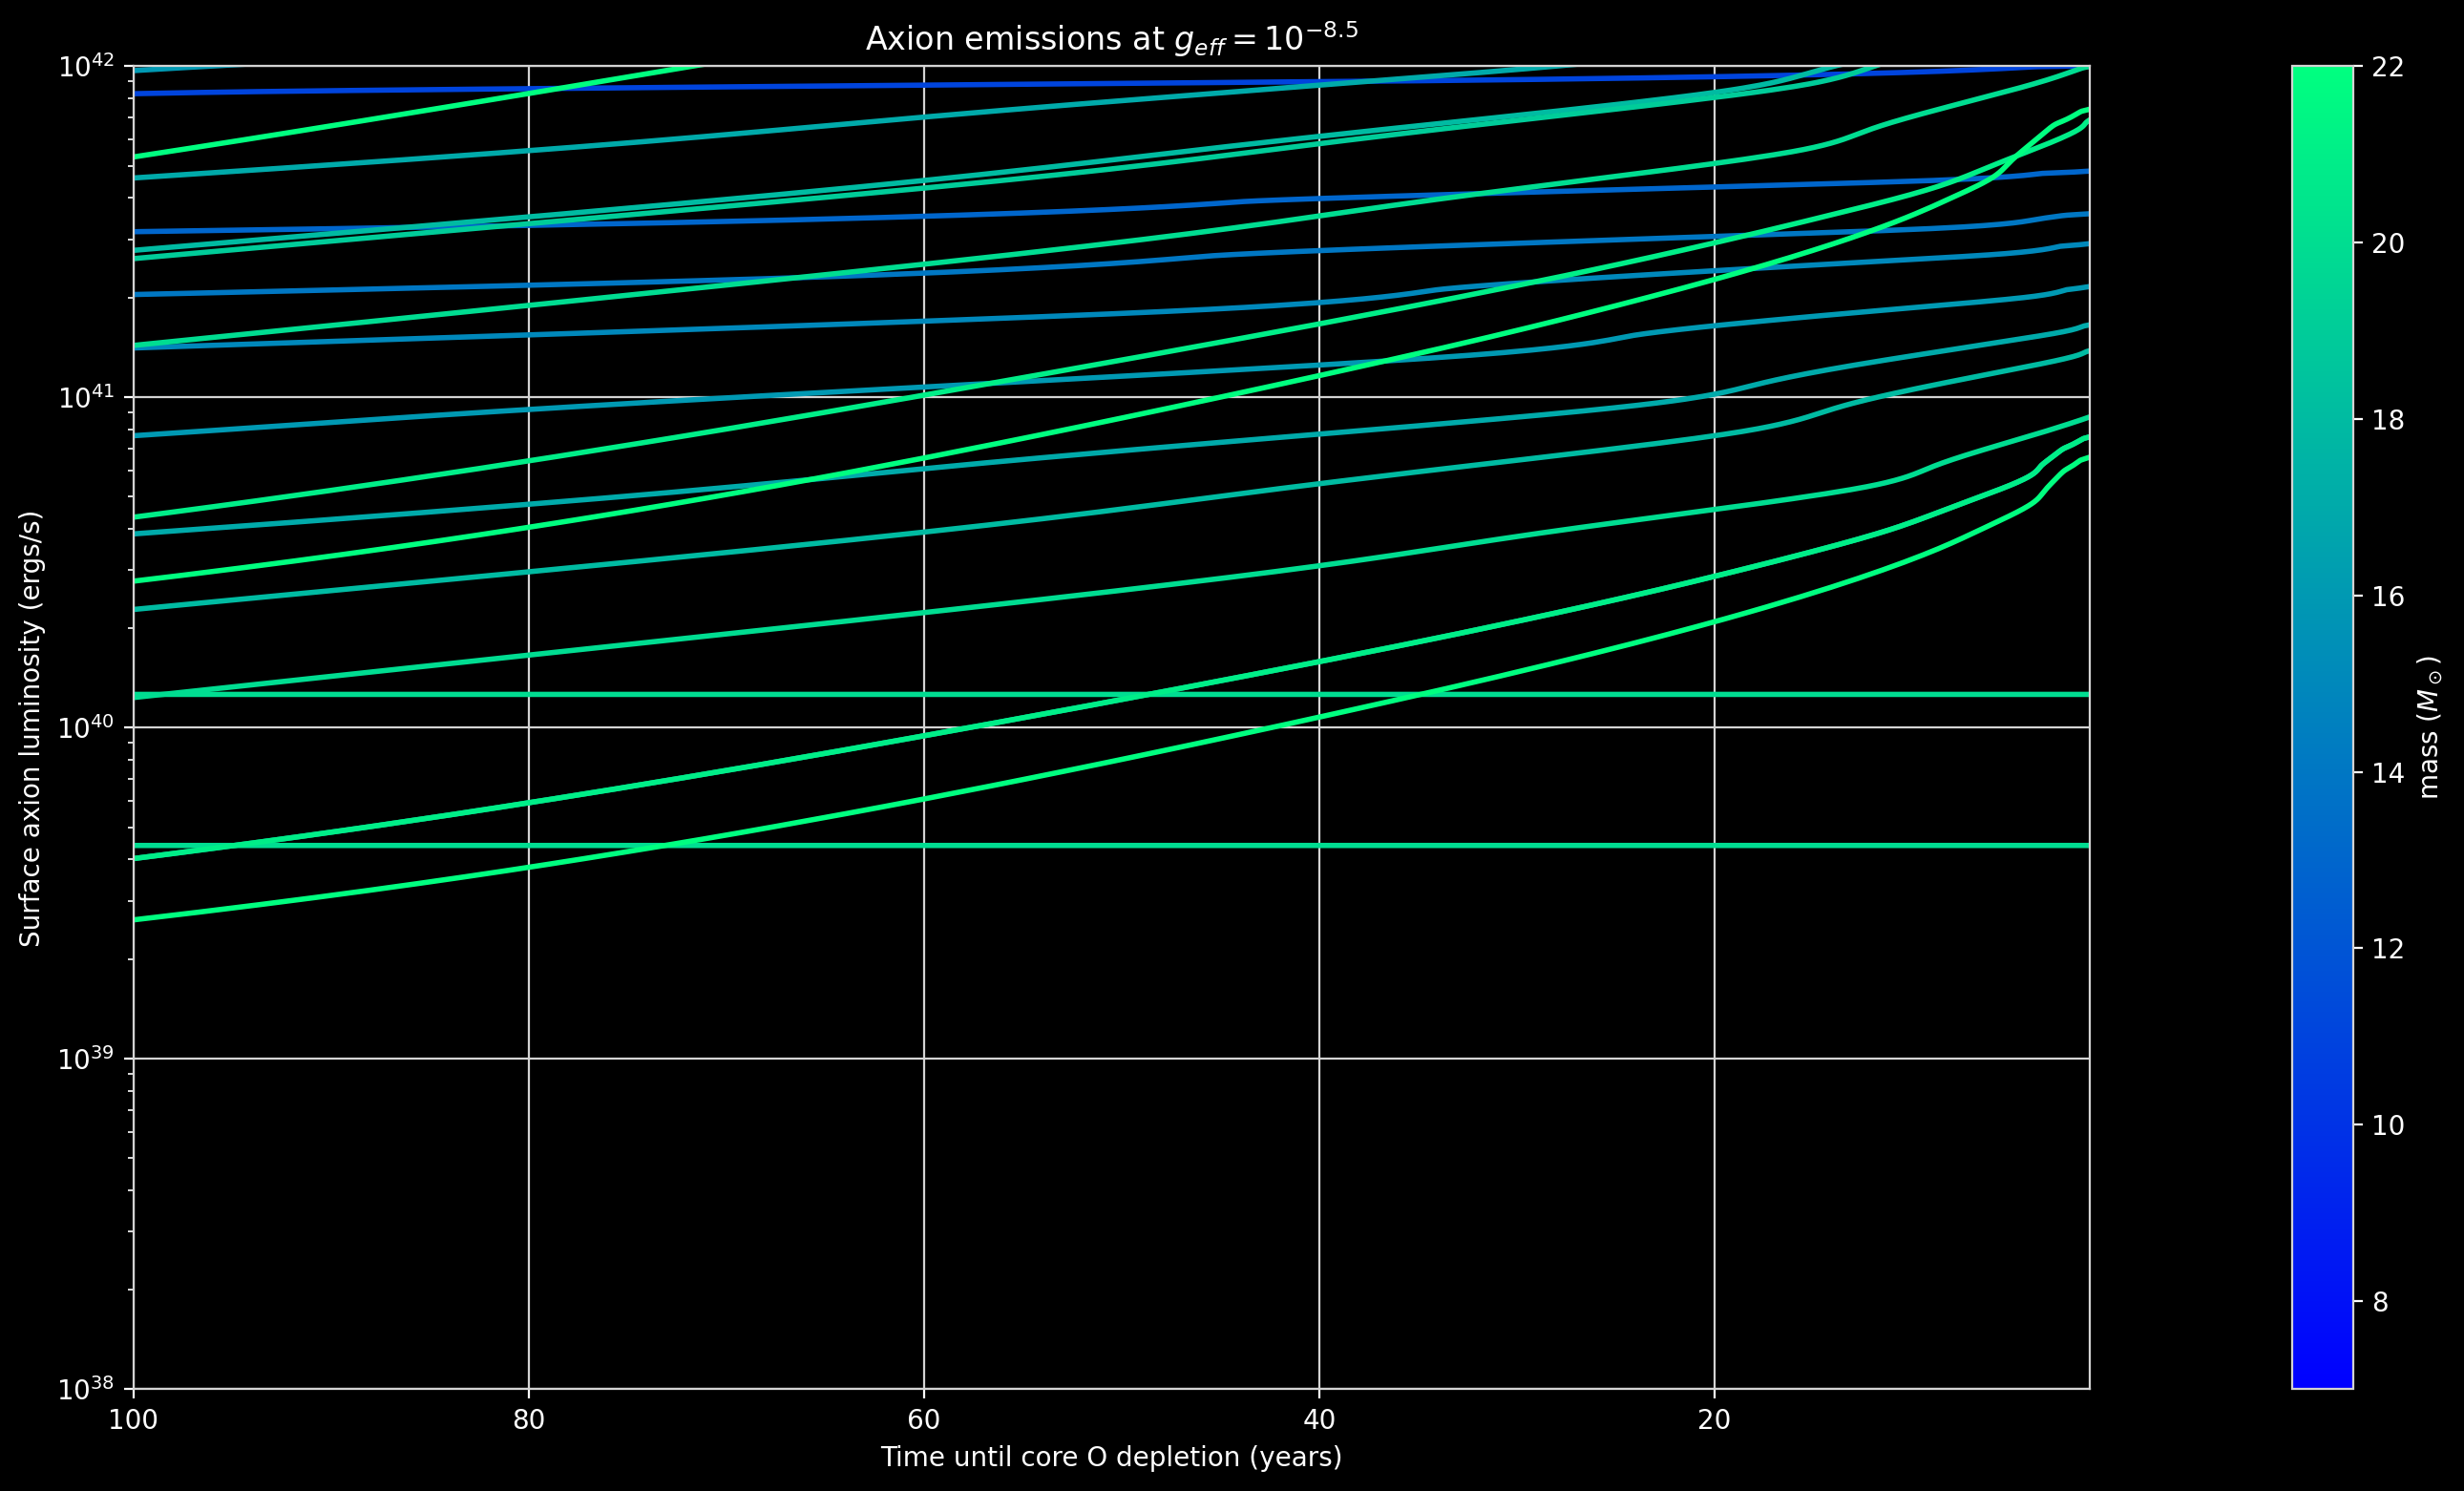

In [15]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['time to core O depletion (years)'])
    dt = np.array(run['dt (years)'])
    rate = np.array(run['surface lum_a (ergs/s)'])
    y = np.cumsum(rate * dt, axis=0)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))

plt.ylim(1e38, 1e42)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

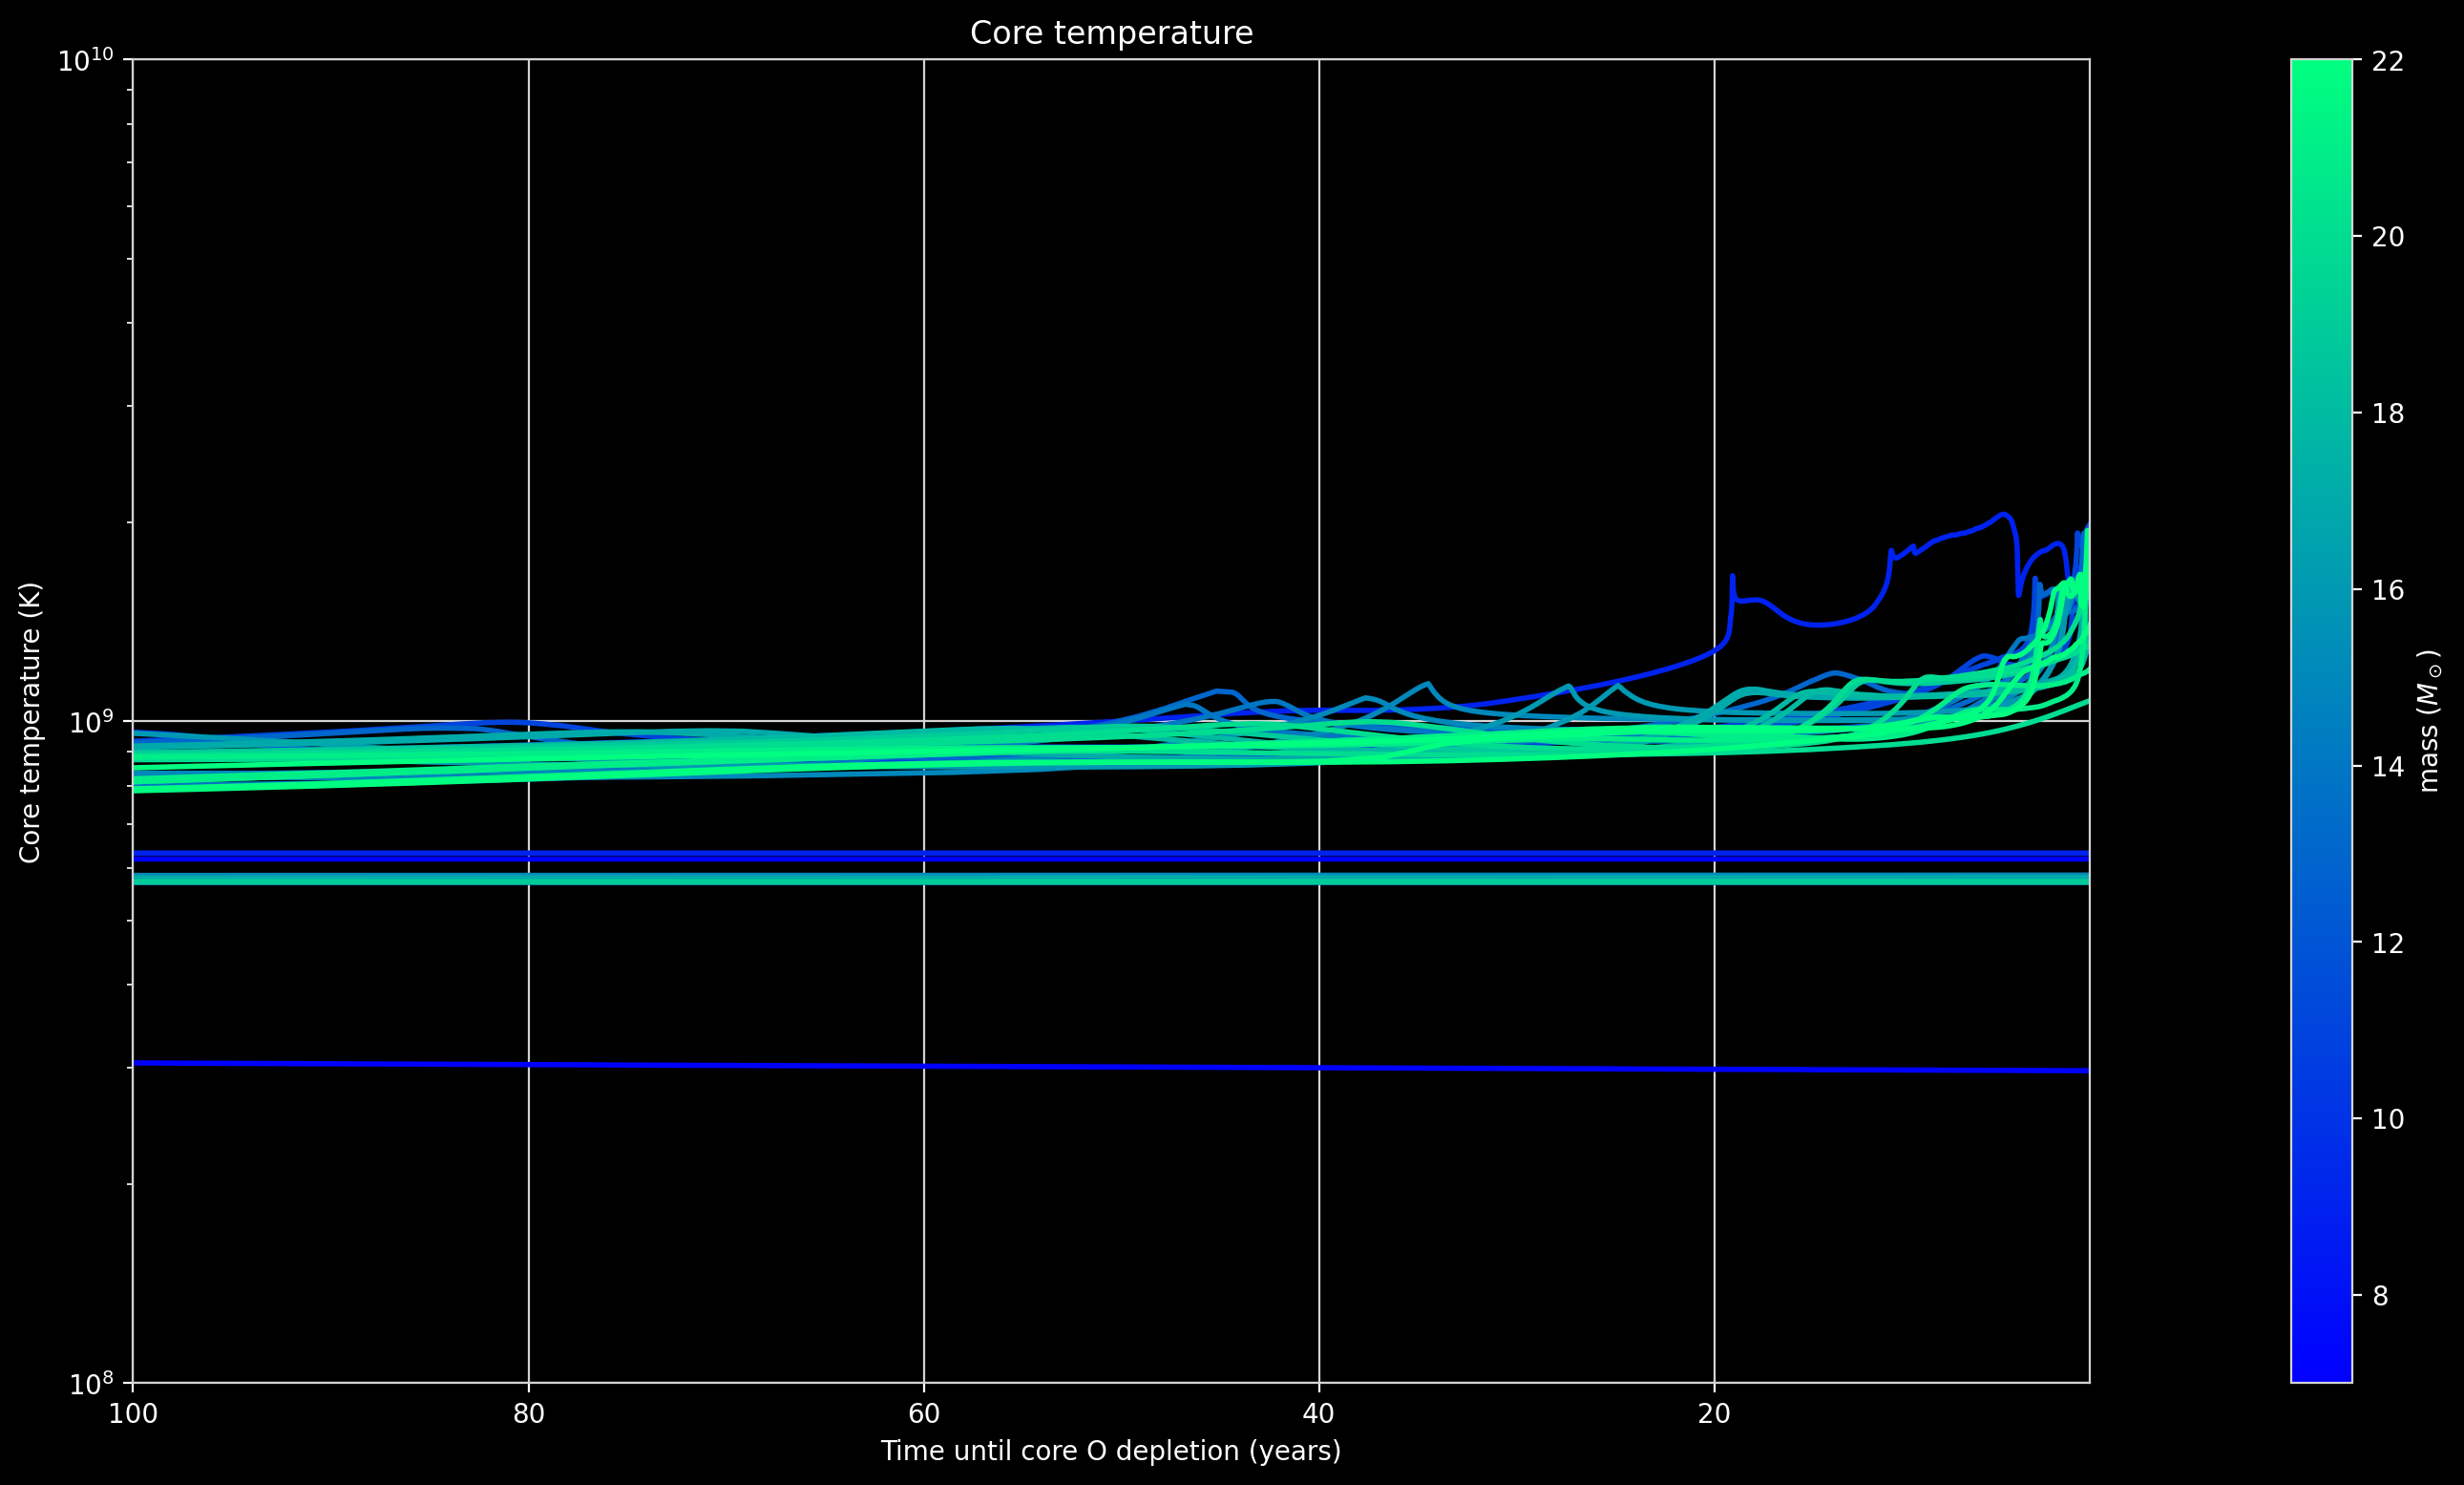

In [107]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e8, 1e10)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Core temperature (K)')
plt.grid()

plt.title('Core temperature', c='white')
plt.show()

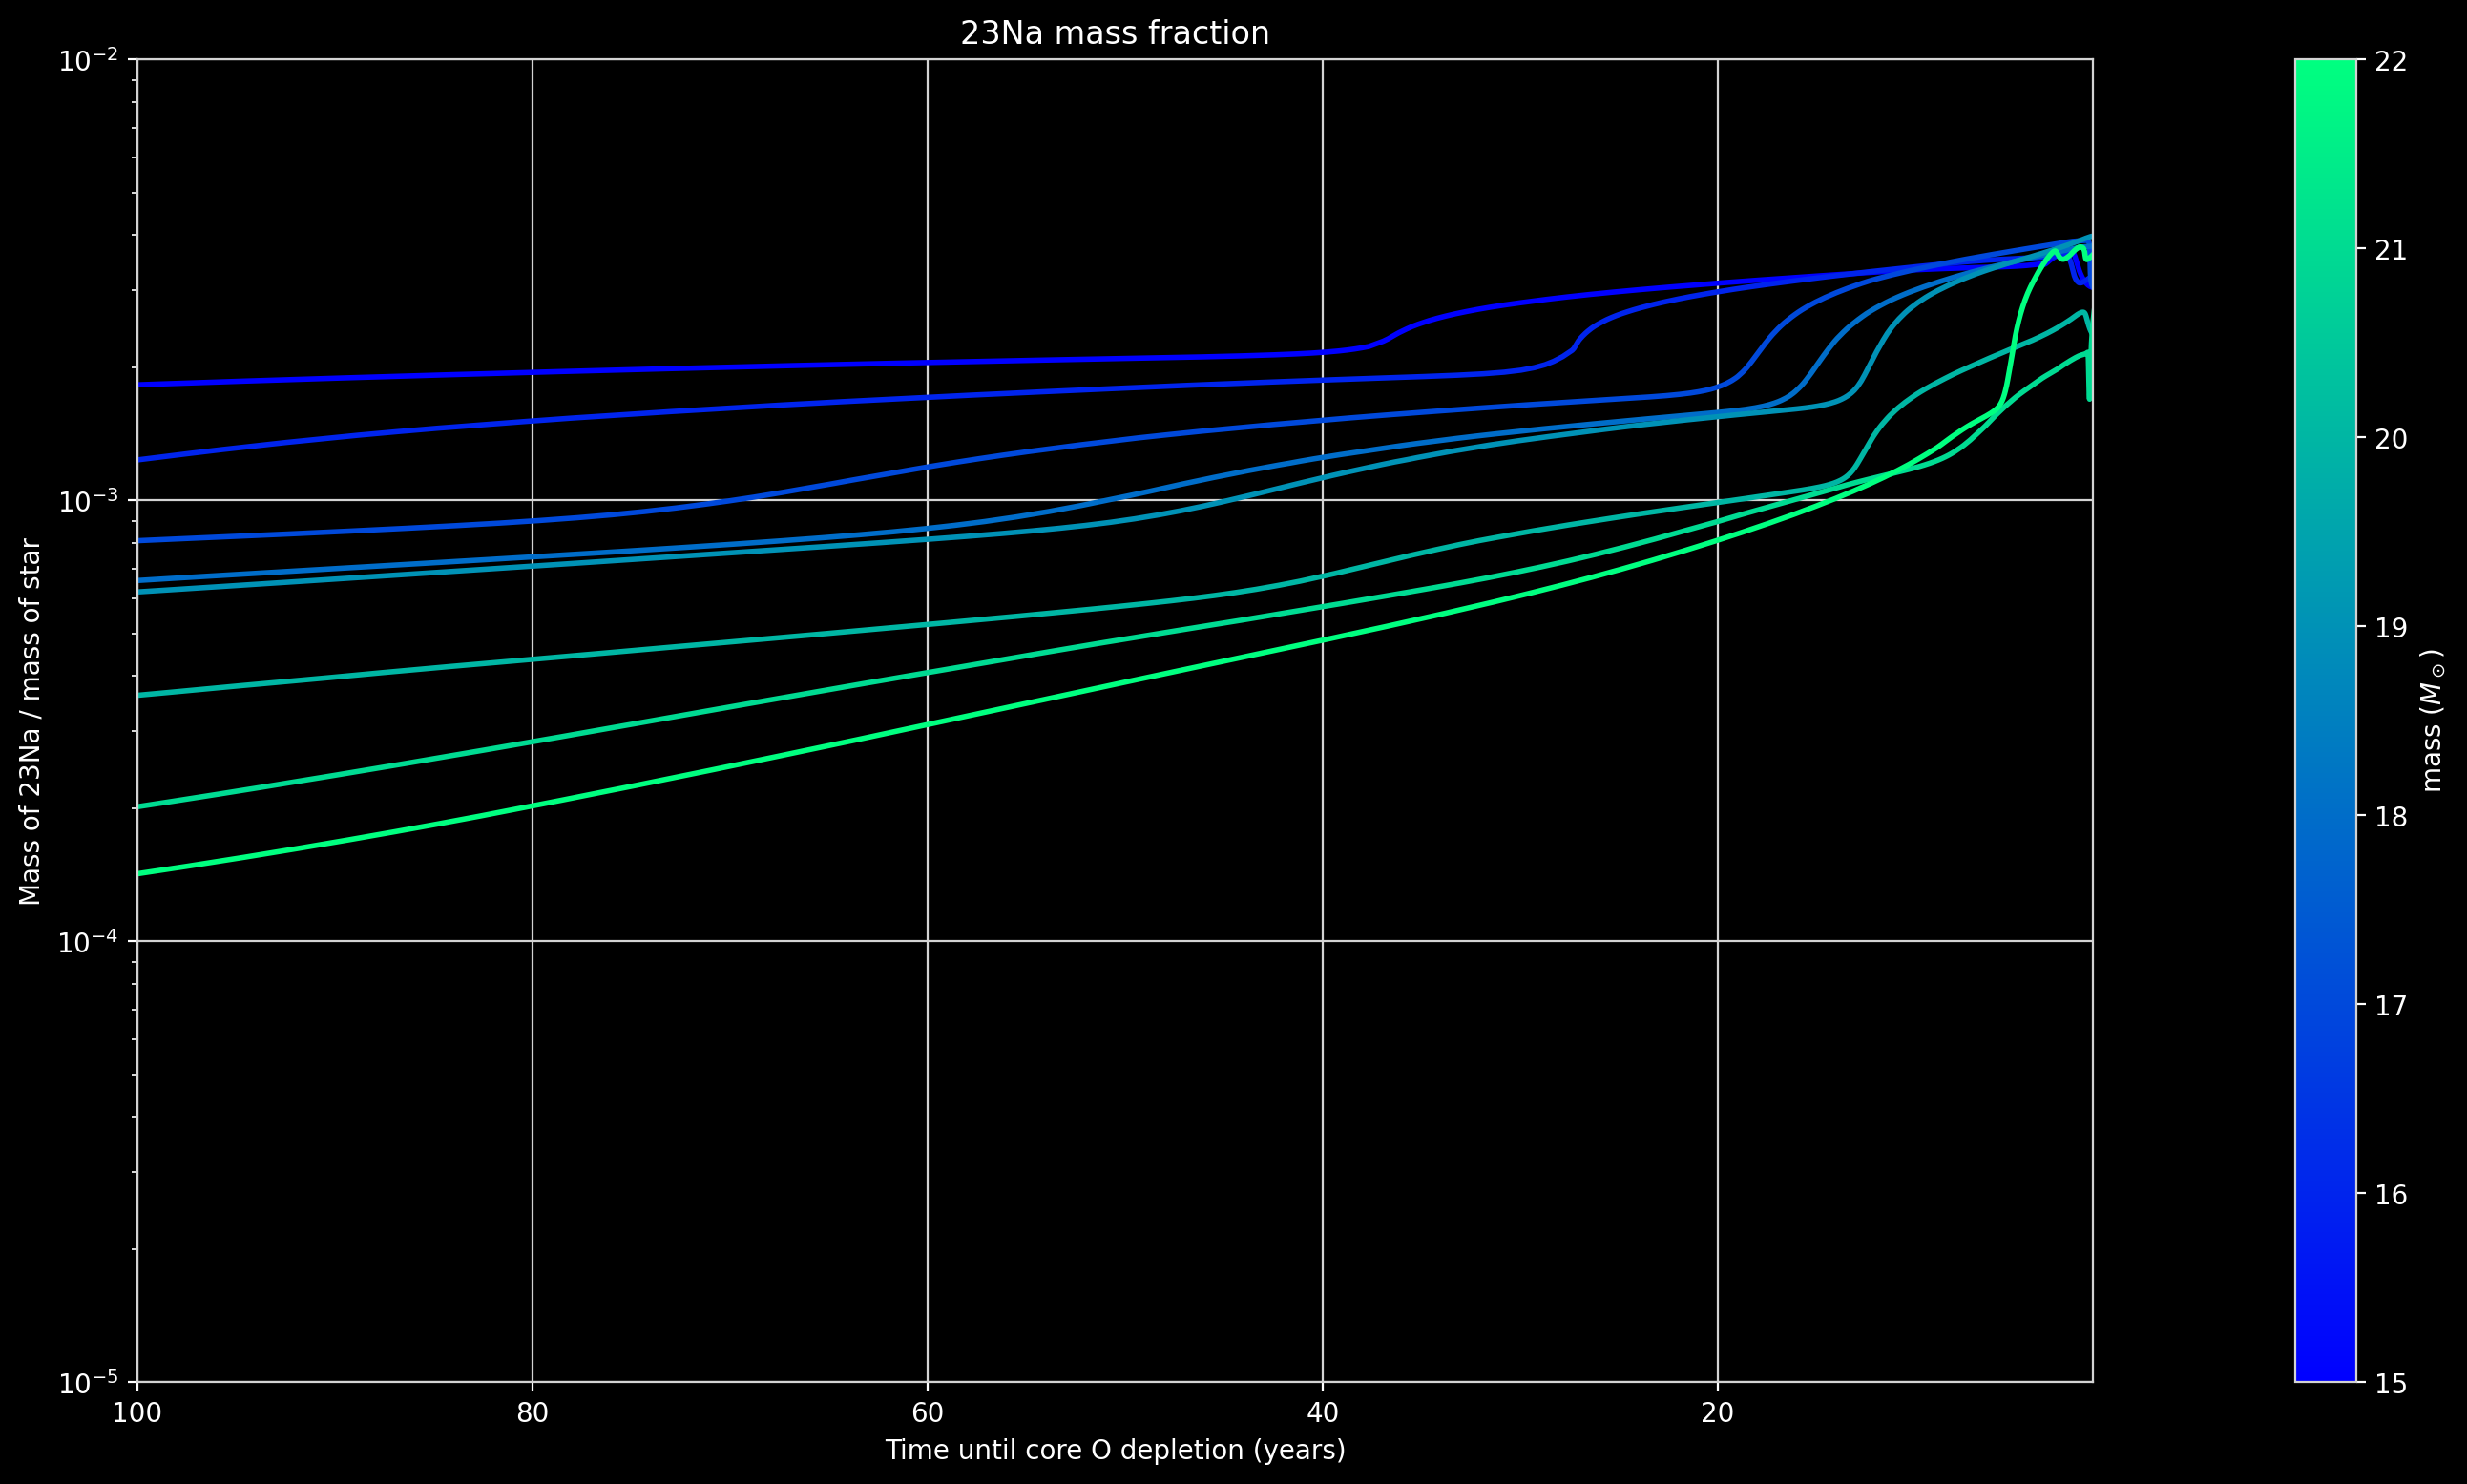

In [93]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['avg X_na23']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e-5, 1e-2)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Mass of 23Na / mass of star')
plt.grid()

plt.title('23Na mass fraction', c='white')
plt.show()

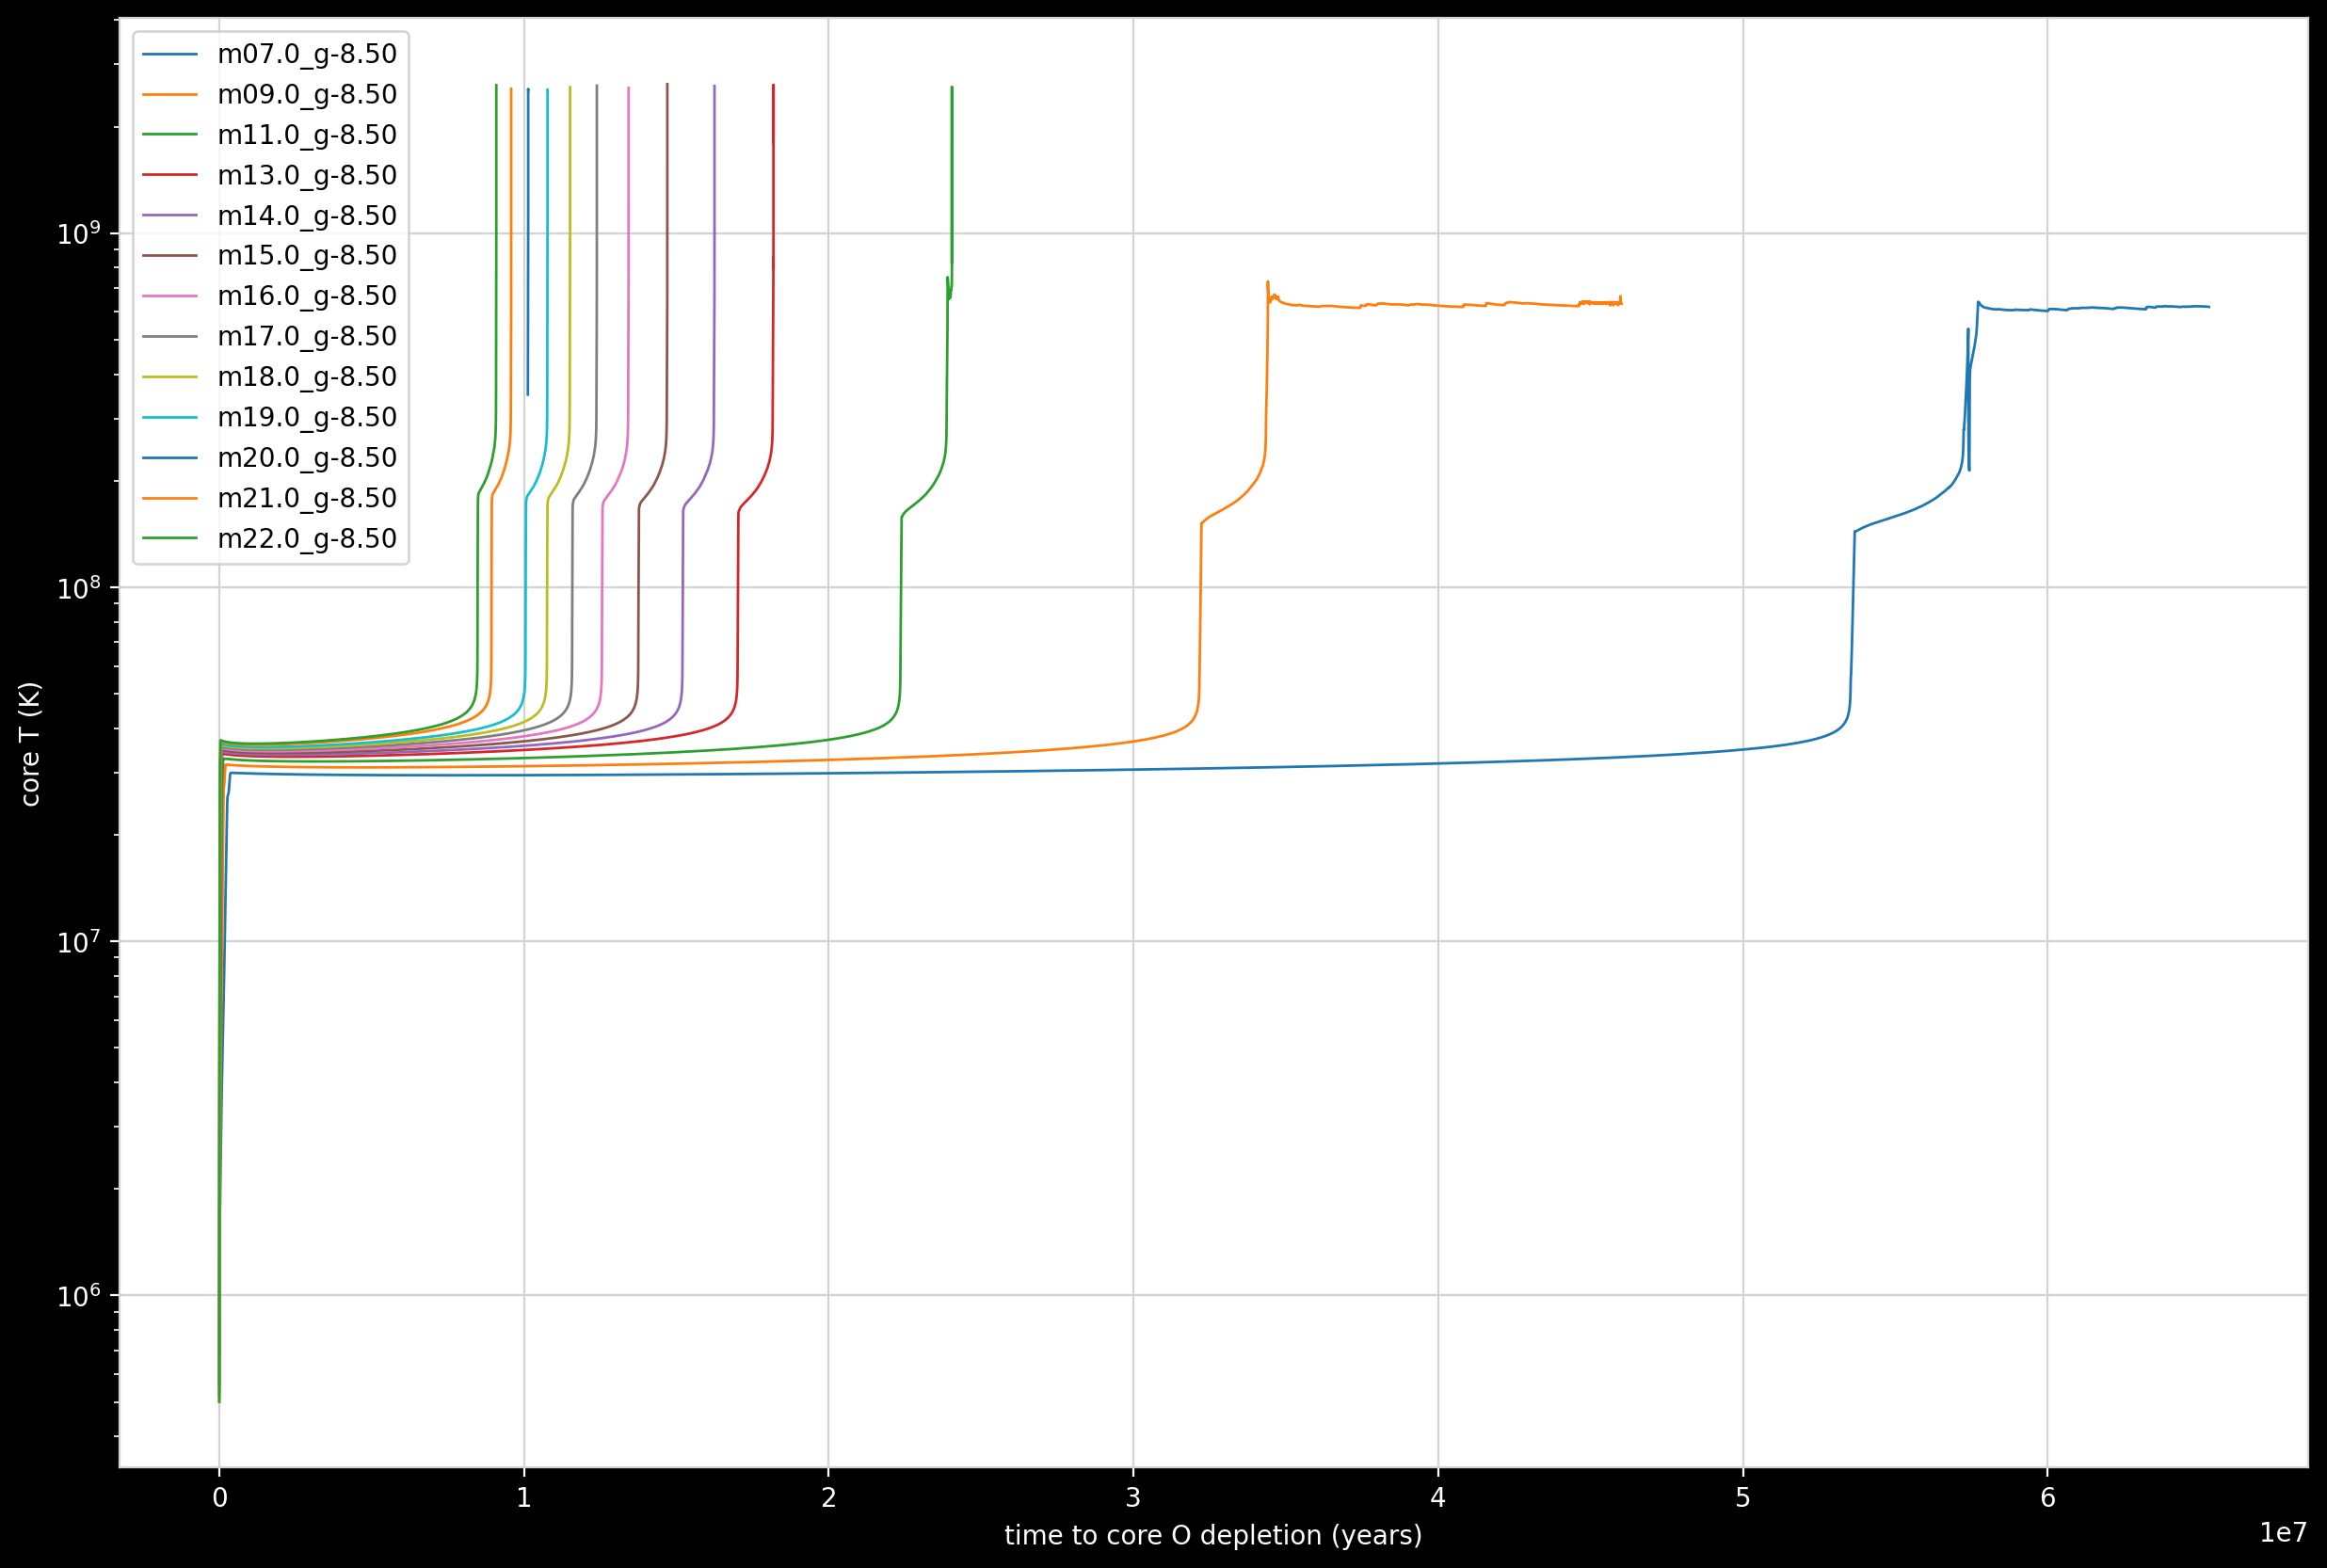

In [49]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['age (years)']
    y = run['core T (K)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
# plt.ylim(1e20, 1e36)
# plt.xlim(1e6, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('core T (K)')
plt.grid()
plt.legend()

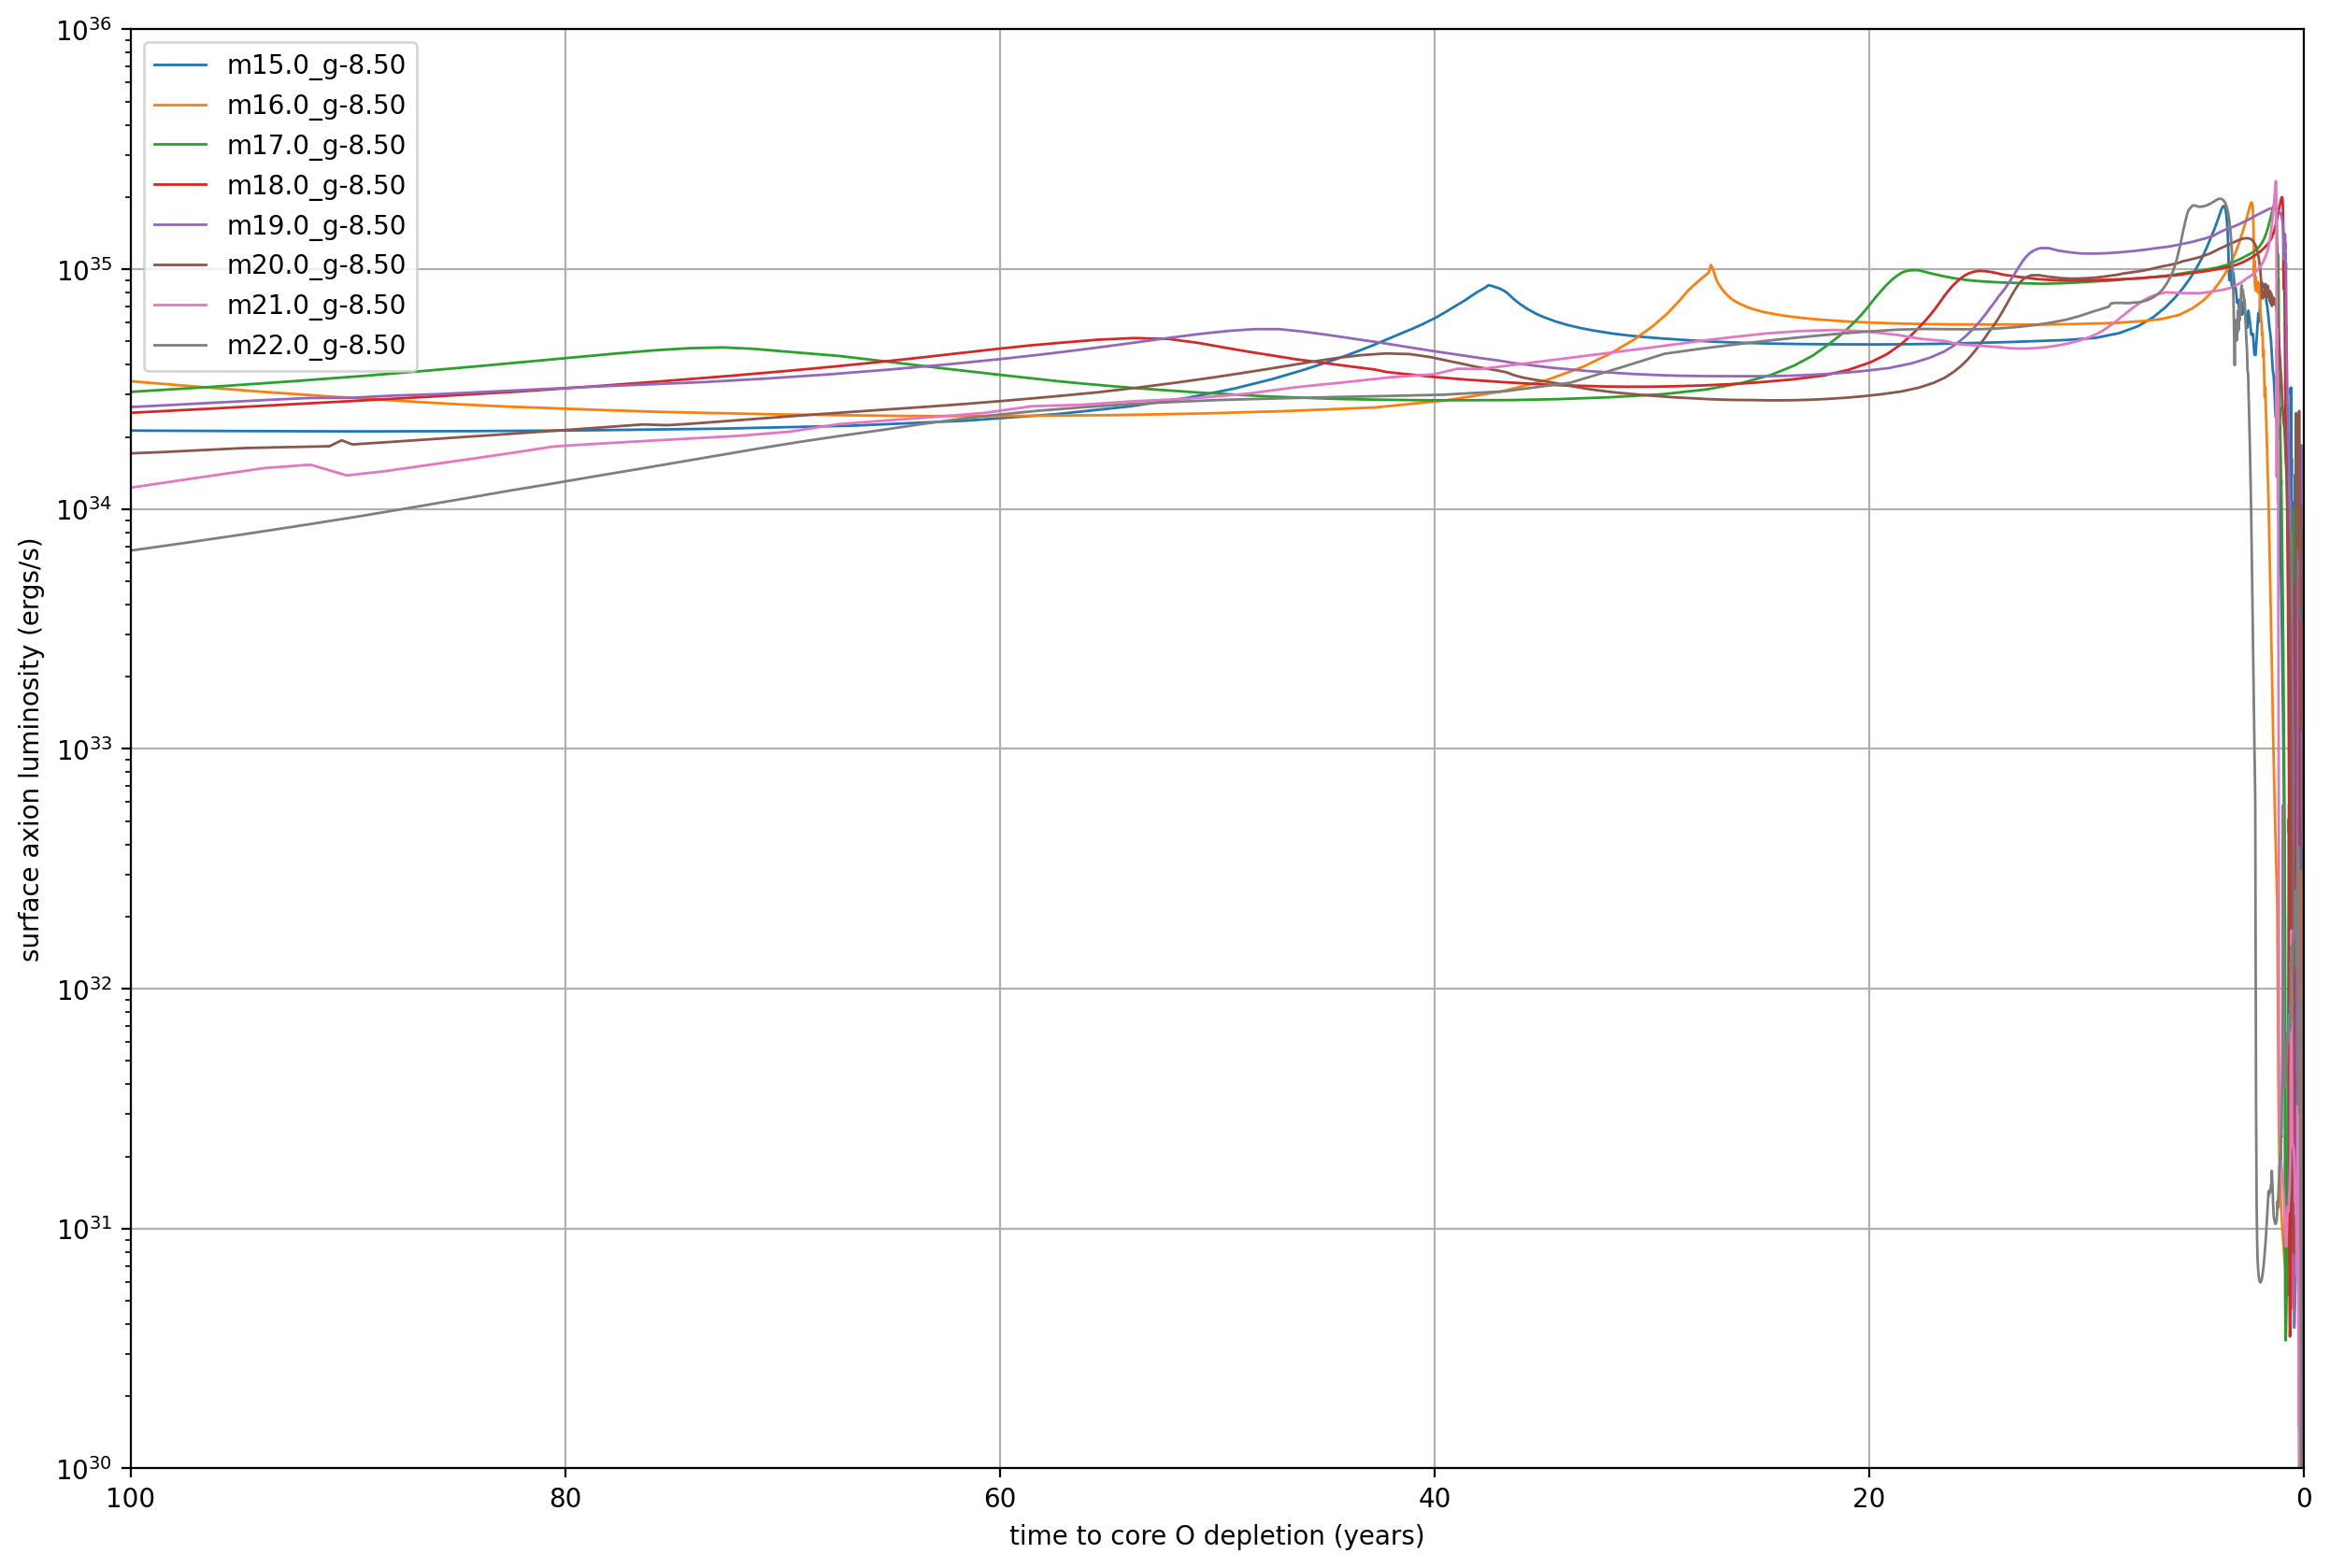

In [53]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
plt.ylim(1e30, 1e36)
plt.xlim(1e2, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('surface axion luminosity (ergs/s)')
plt.grid()
plt.legend()

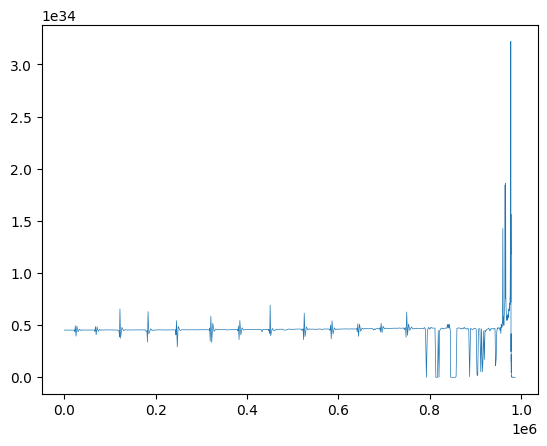

In [10]:
run = runs['g-7.0']
plt.plot(run['time to core O depletion (years)'], np.maximum(10, run['surface lum_a (ergs/s)']), lw=0.5)
# plt.xlim(1000, 0)

In [49]:
np.min(np.array(run['surface lum_a (ergs/s)']))

np.float64(-4.227117894505061e+36)